In [16]:
## Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

warnings.simplefilter("ignore")

In [17]:
df_mat = pd.read_csv('student-mat.csv')
df_mat.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [18]:
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [19]:
df = pd.concat([df_por, df_mat])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [20]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [21]:
duplicates = df[df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first')]
duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [22]:
#cols = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery",
#        "romantic", "higher", "internet", "guardian", "health", "Walc", "Dalc"]
#df = df.drop_duplicates(subset=cols, keep='first')

In [23]:
df.drop("school", axis=1, inplace=True)
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1044, 32)
(1044, 32)
(1044, 32)
(1044, 32)


In [24]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
num_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

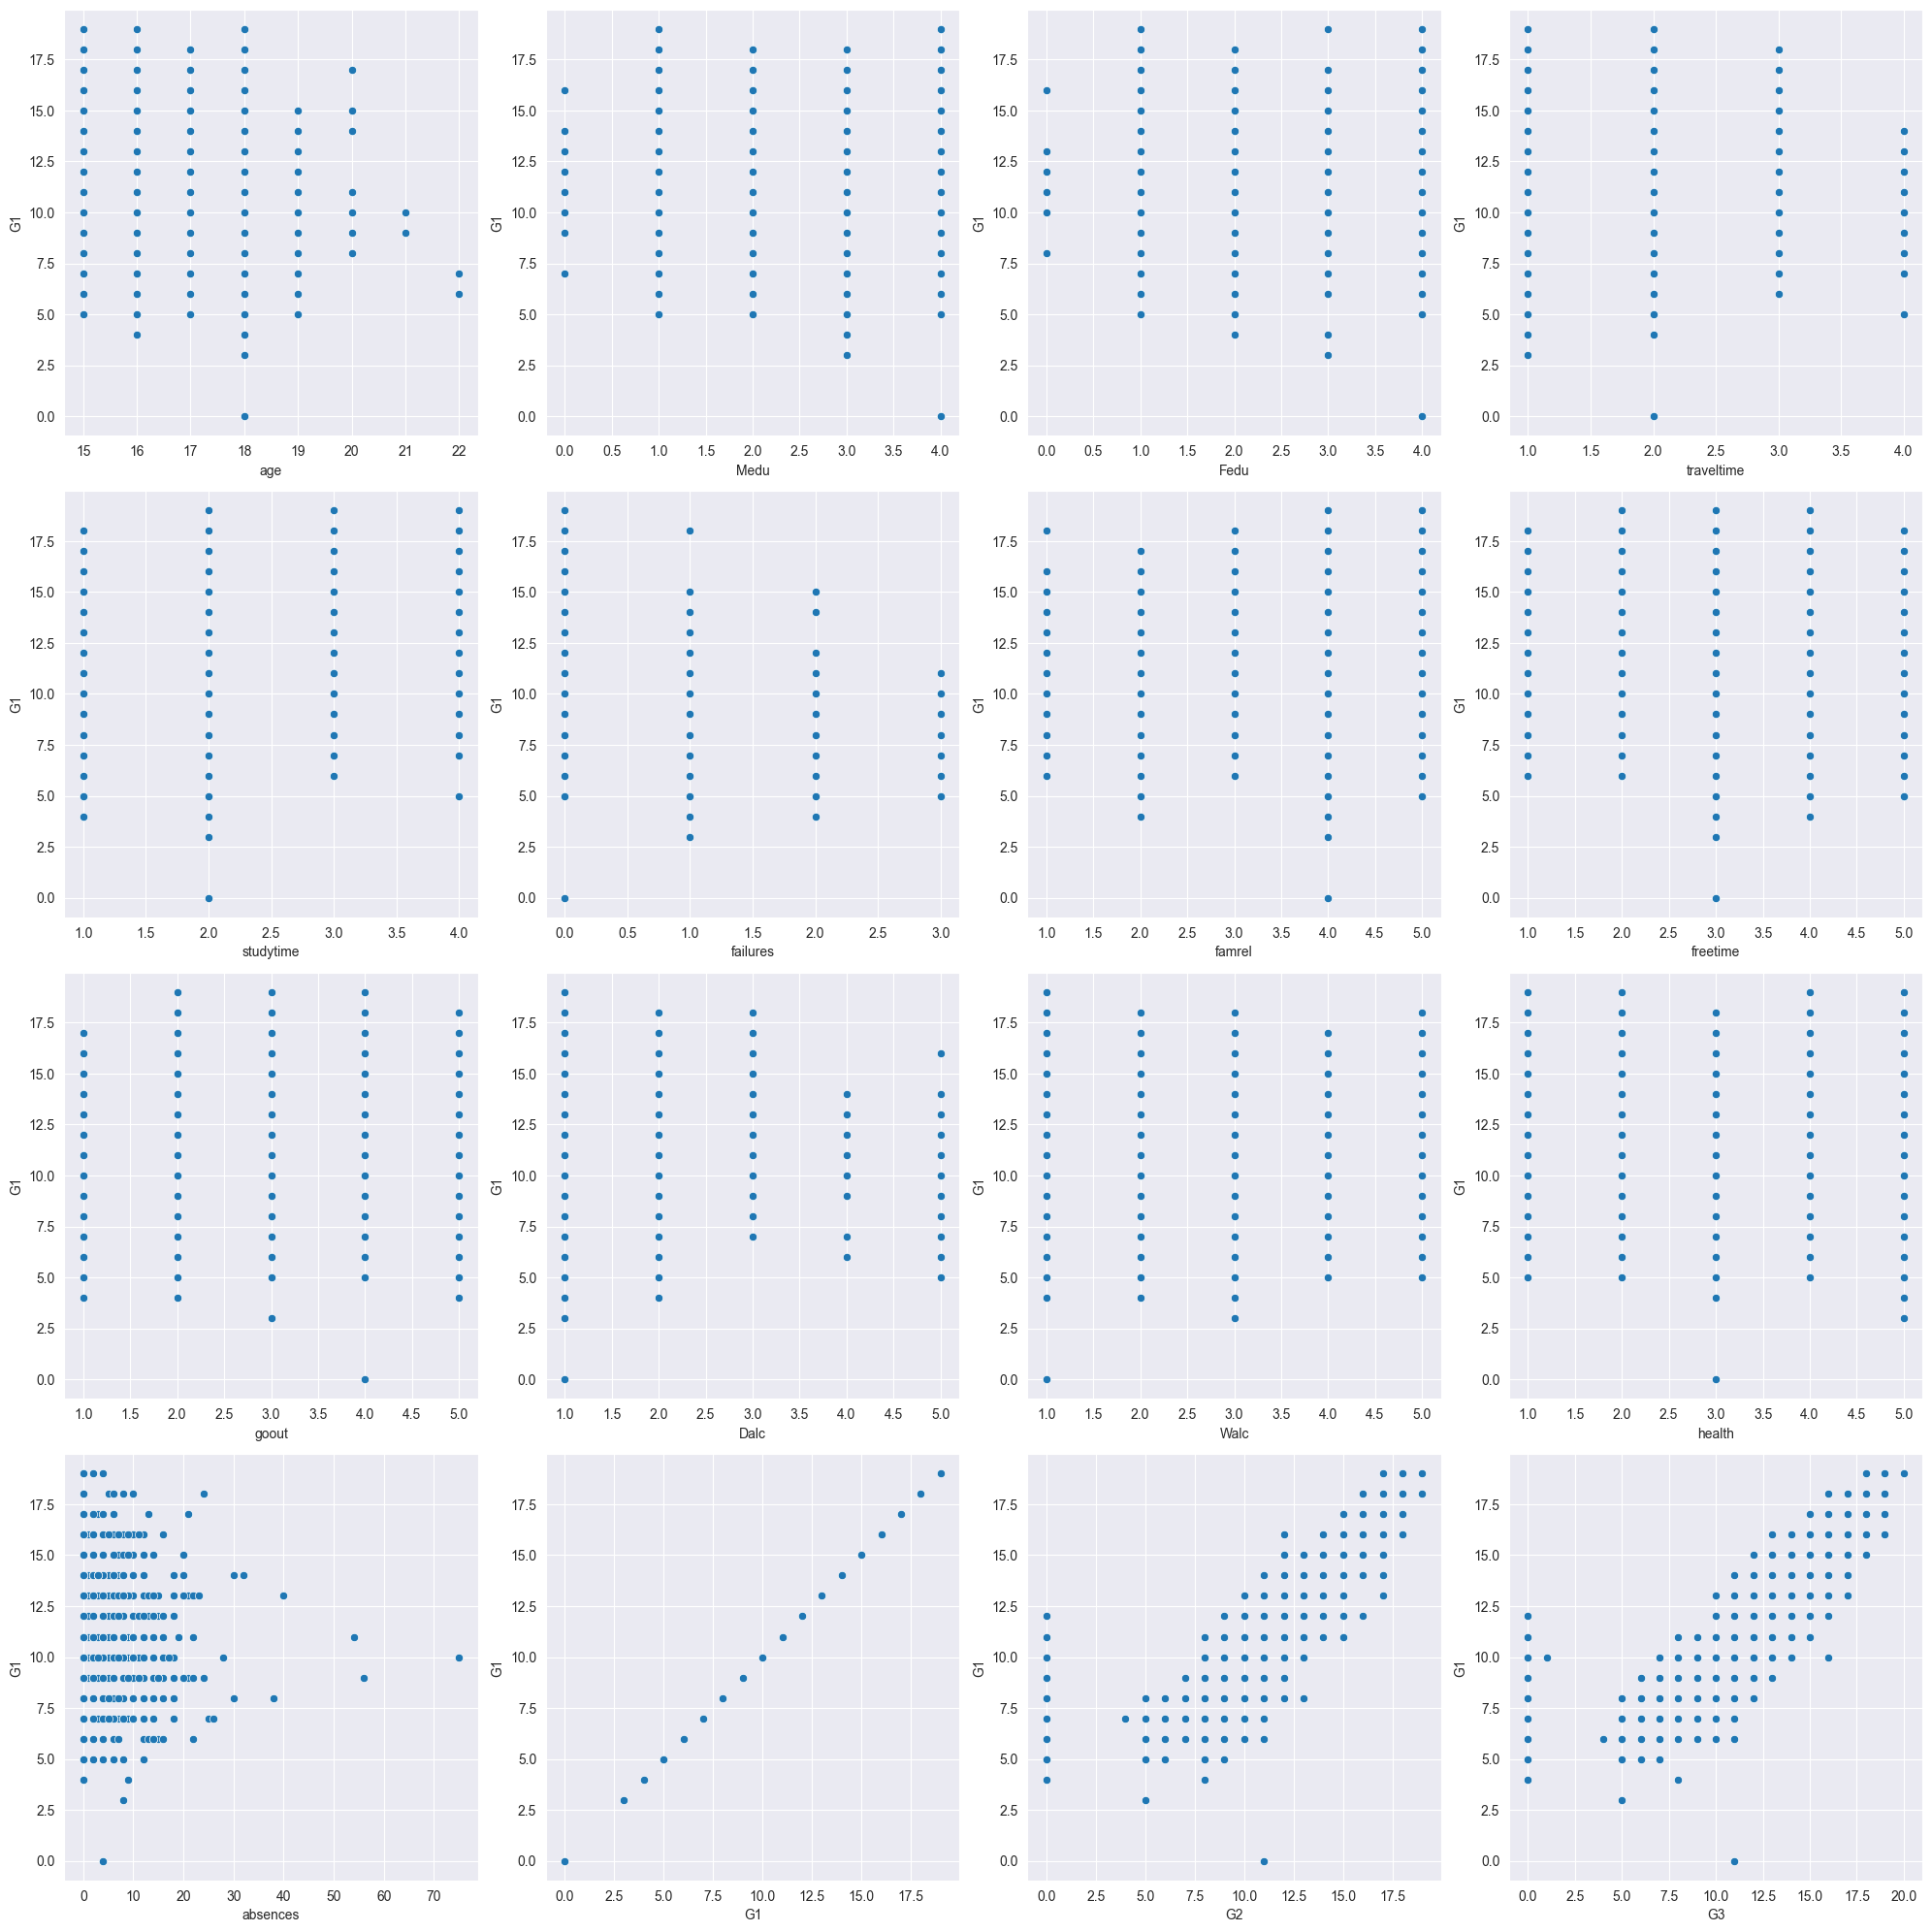

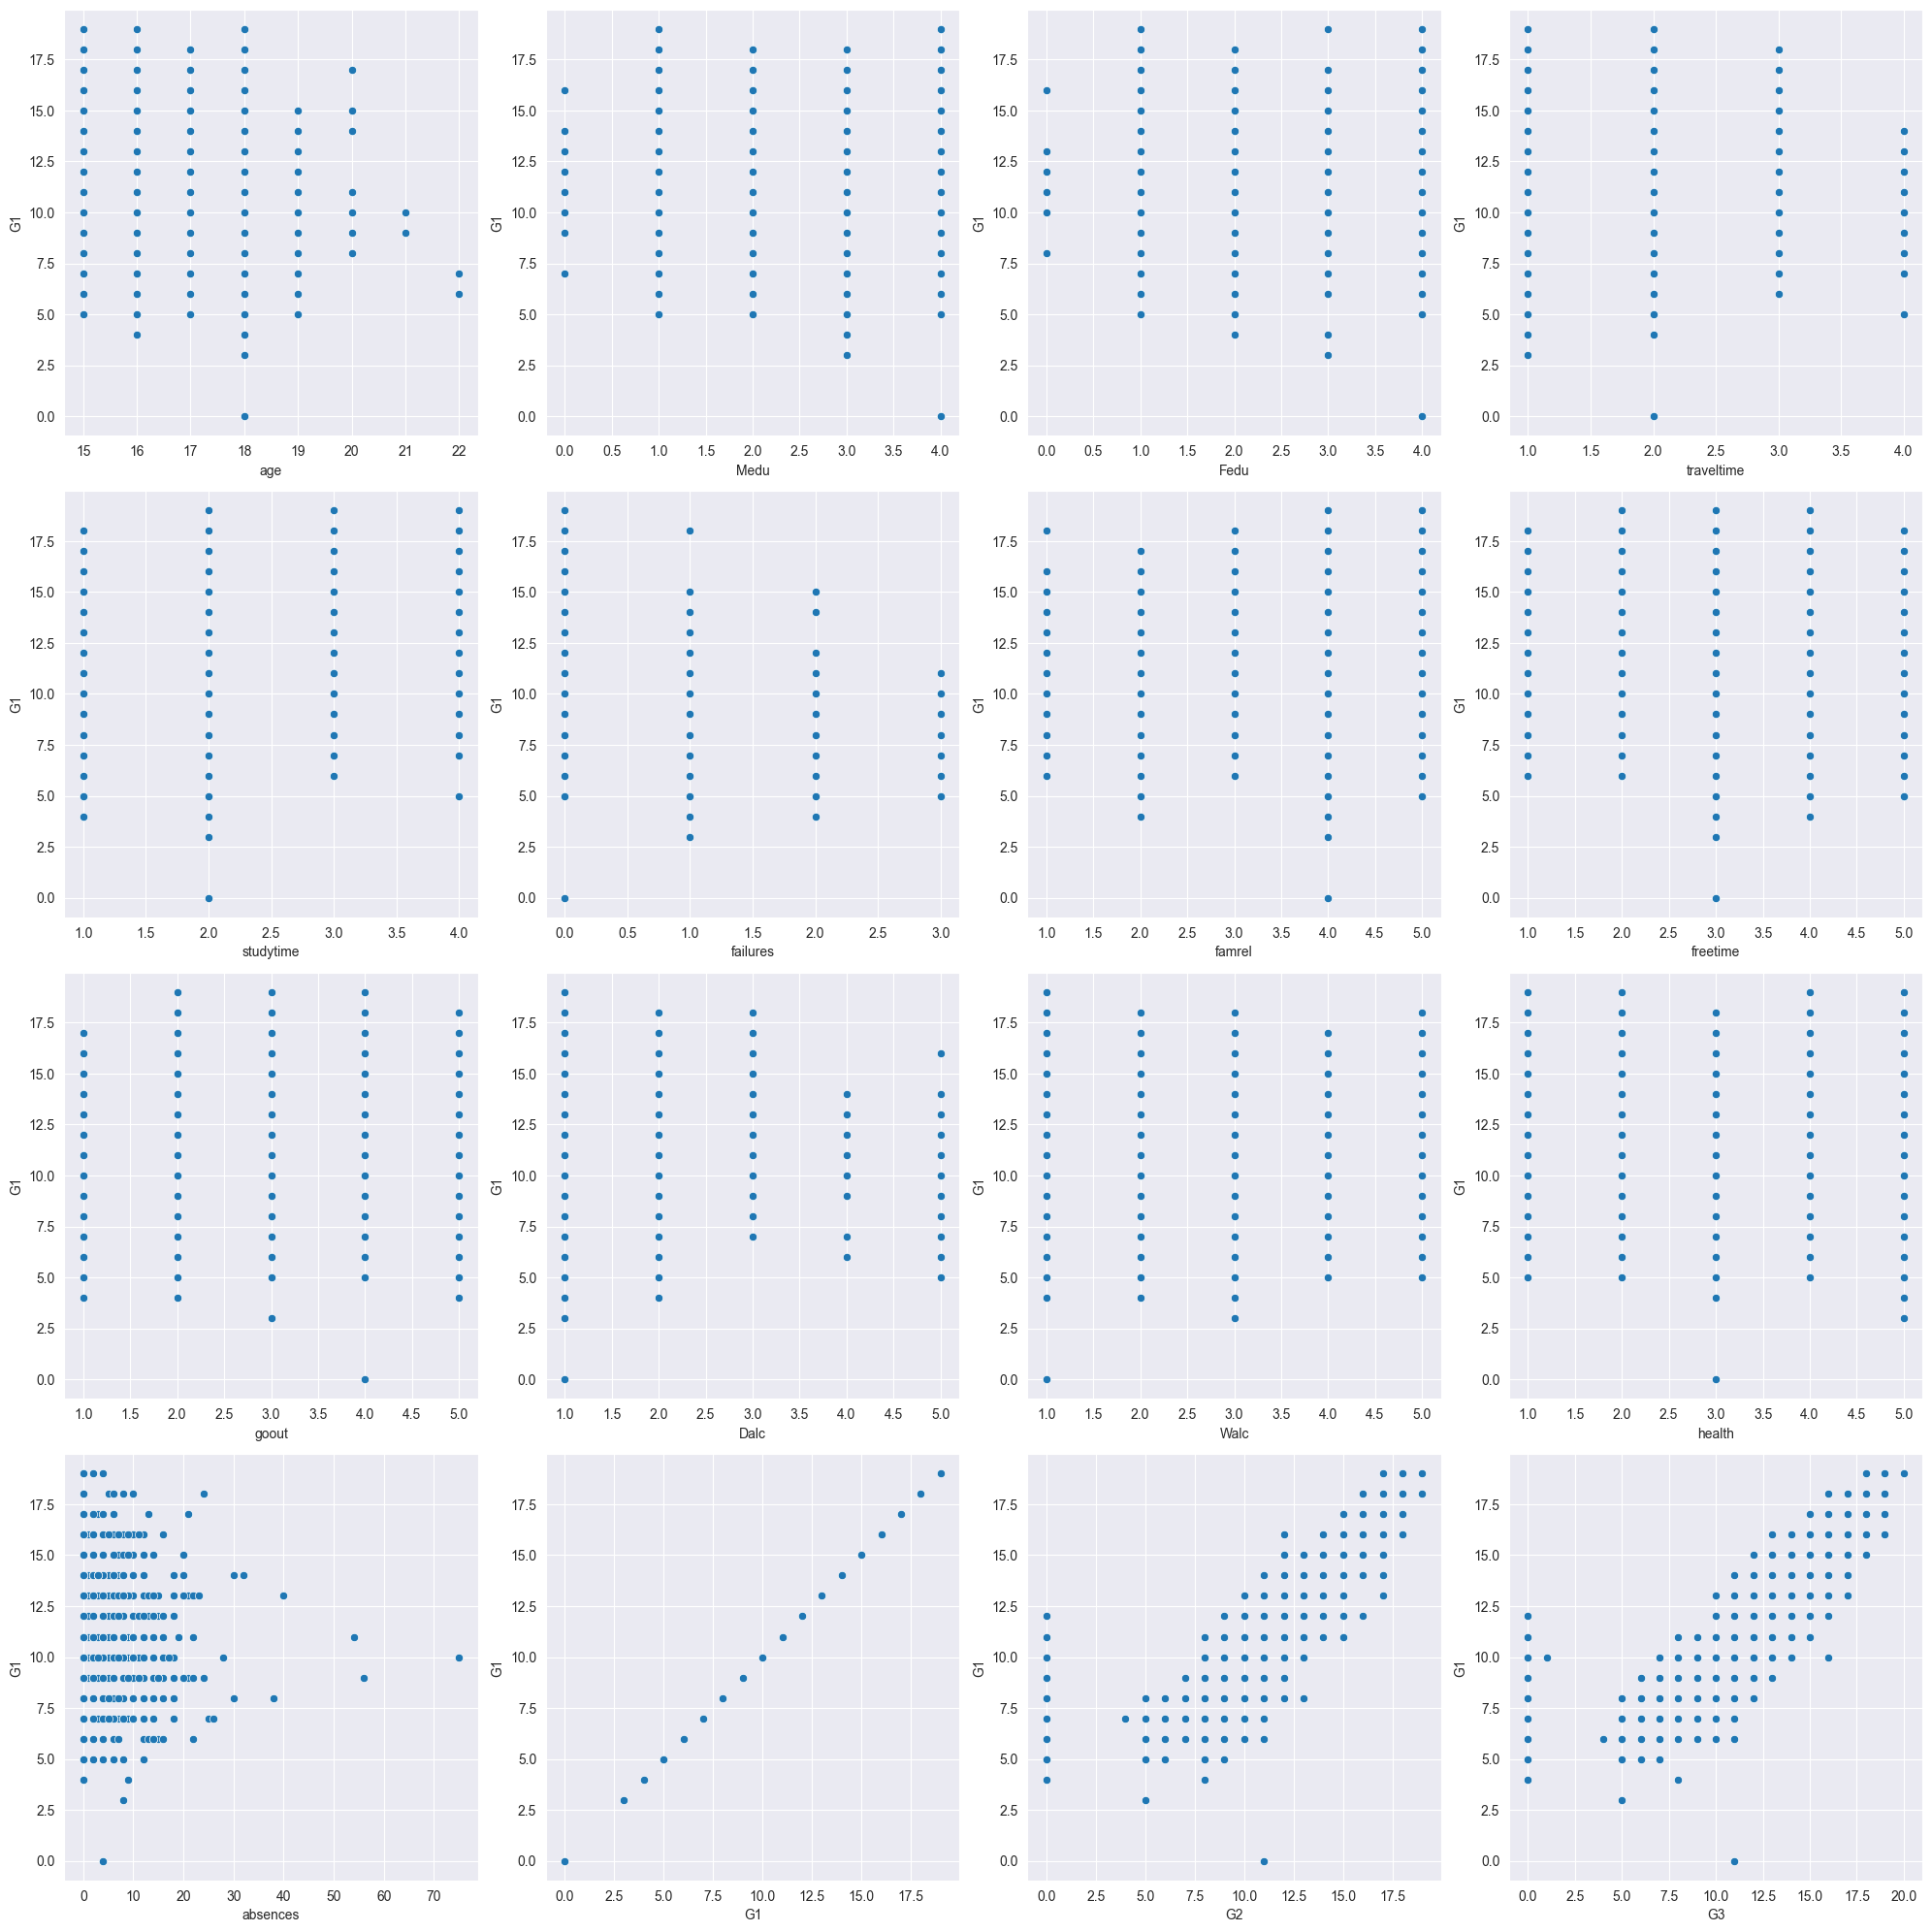

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G1',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

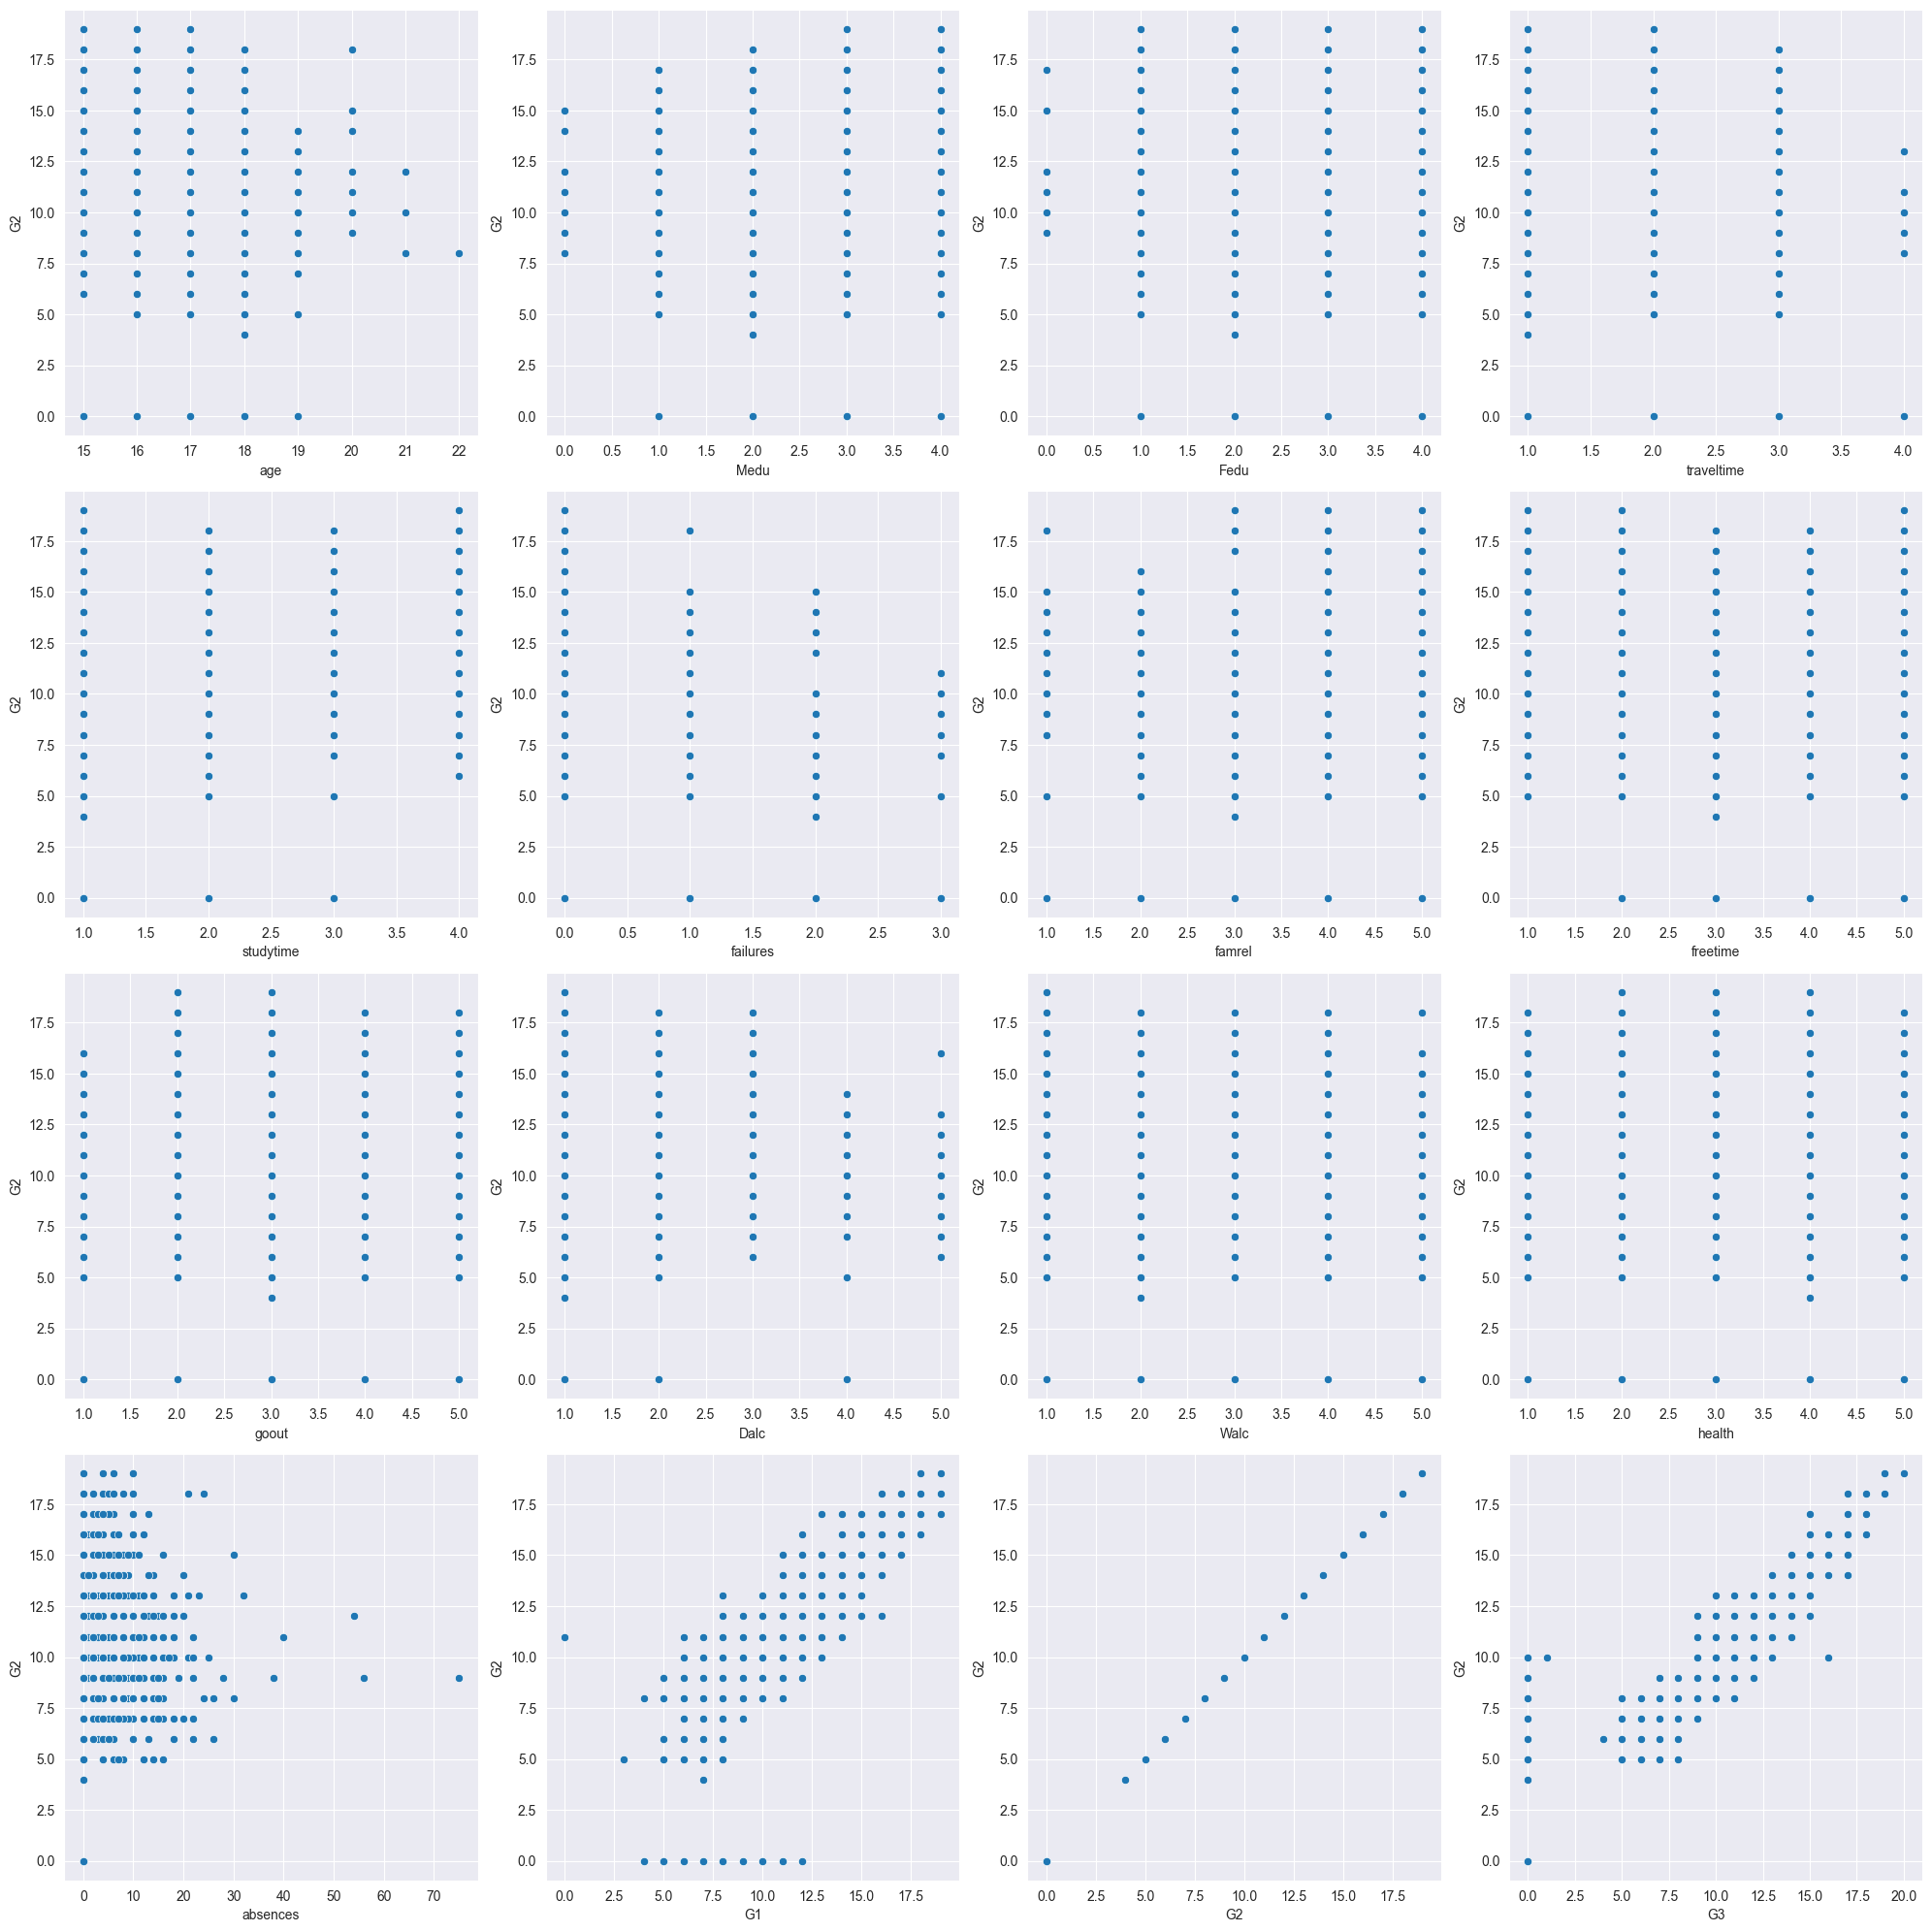

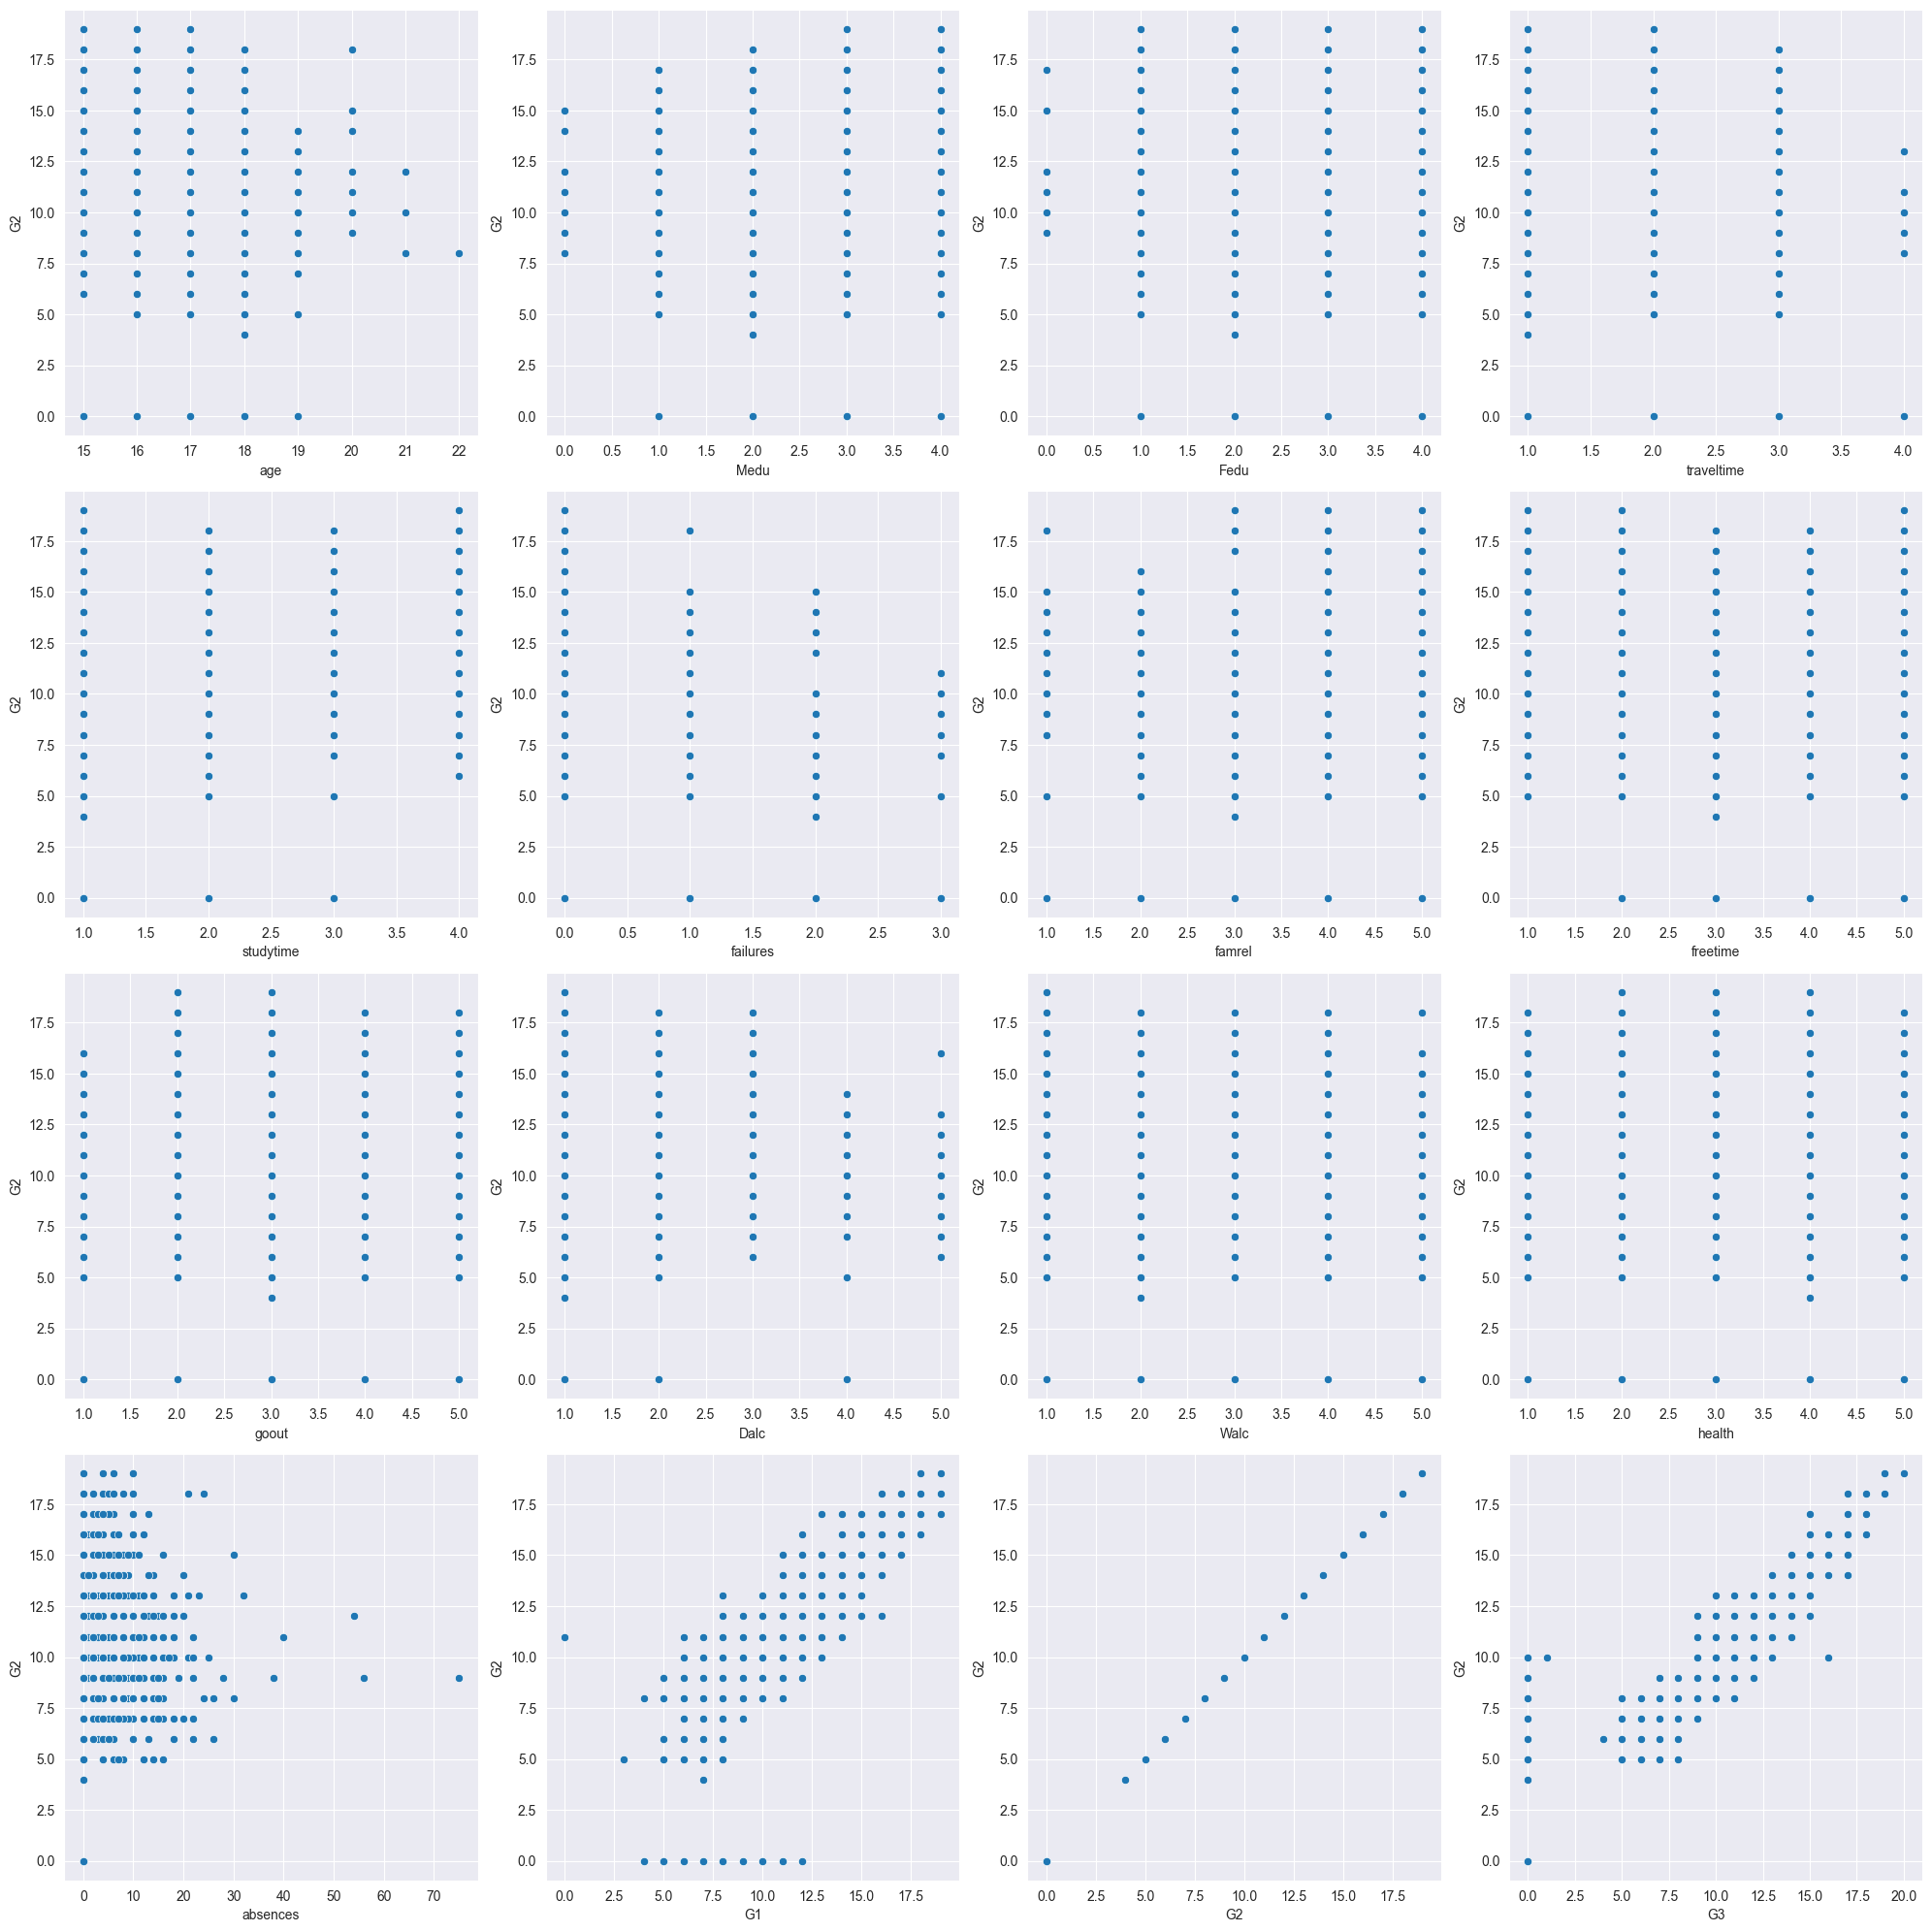

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G2',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

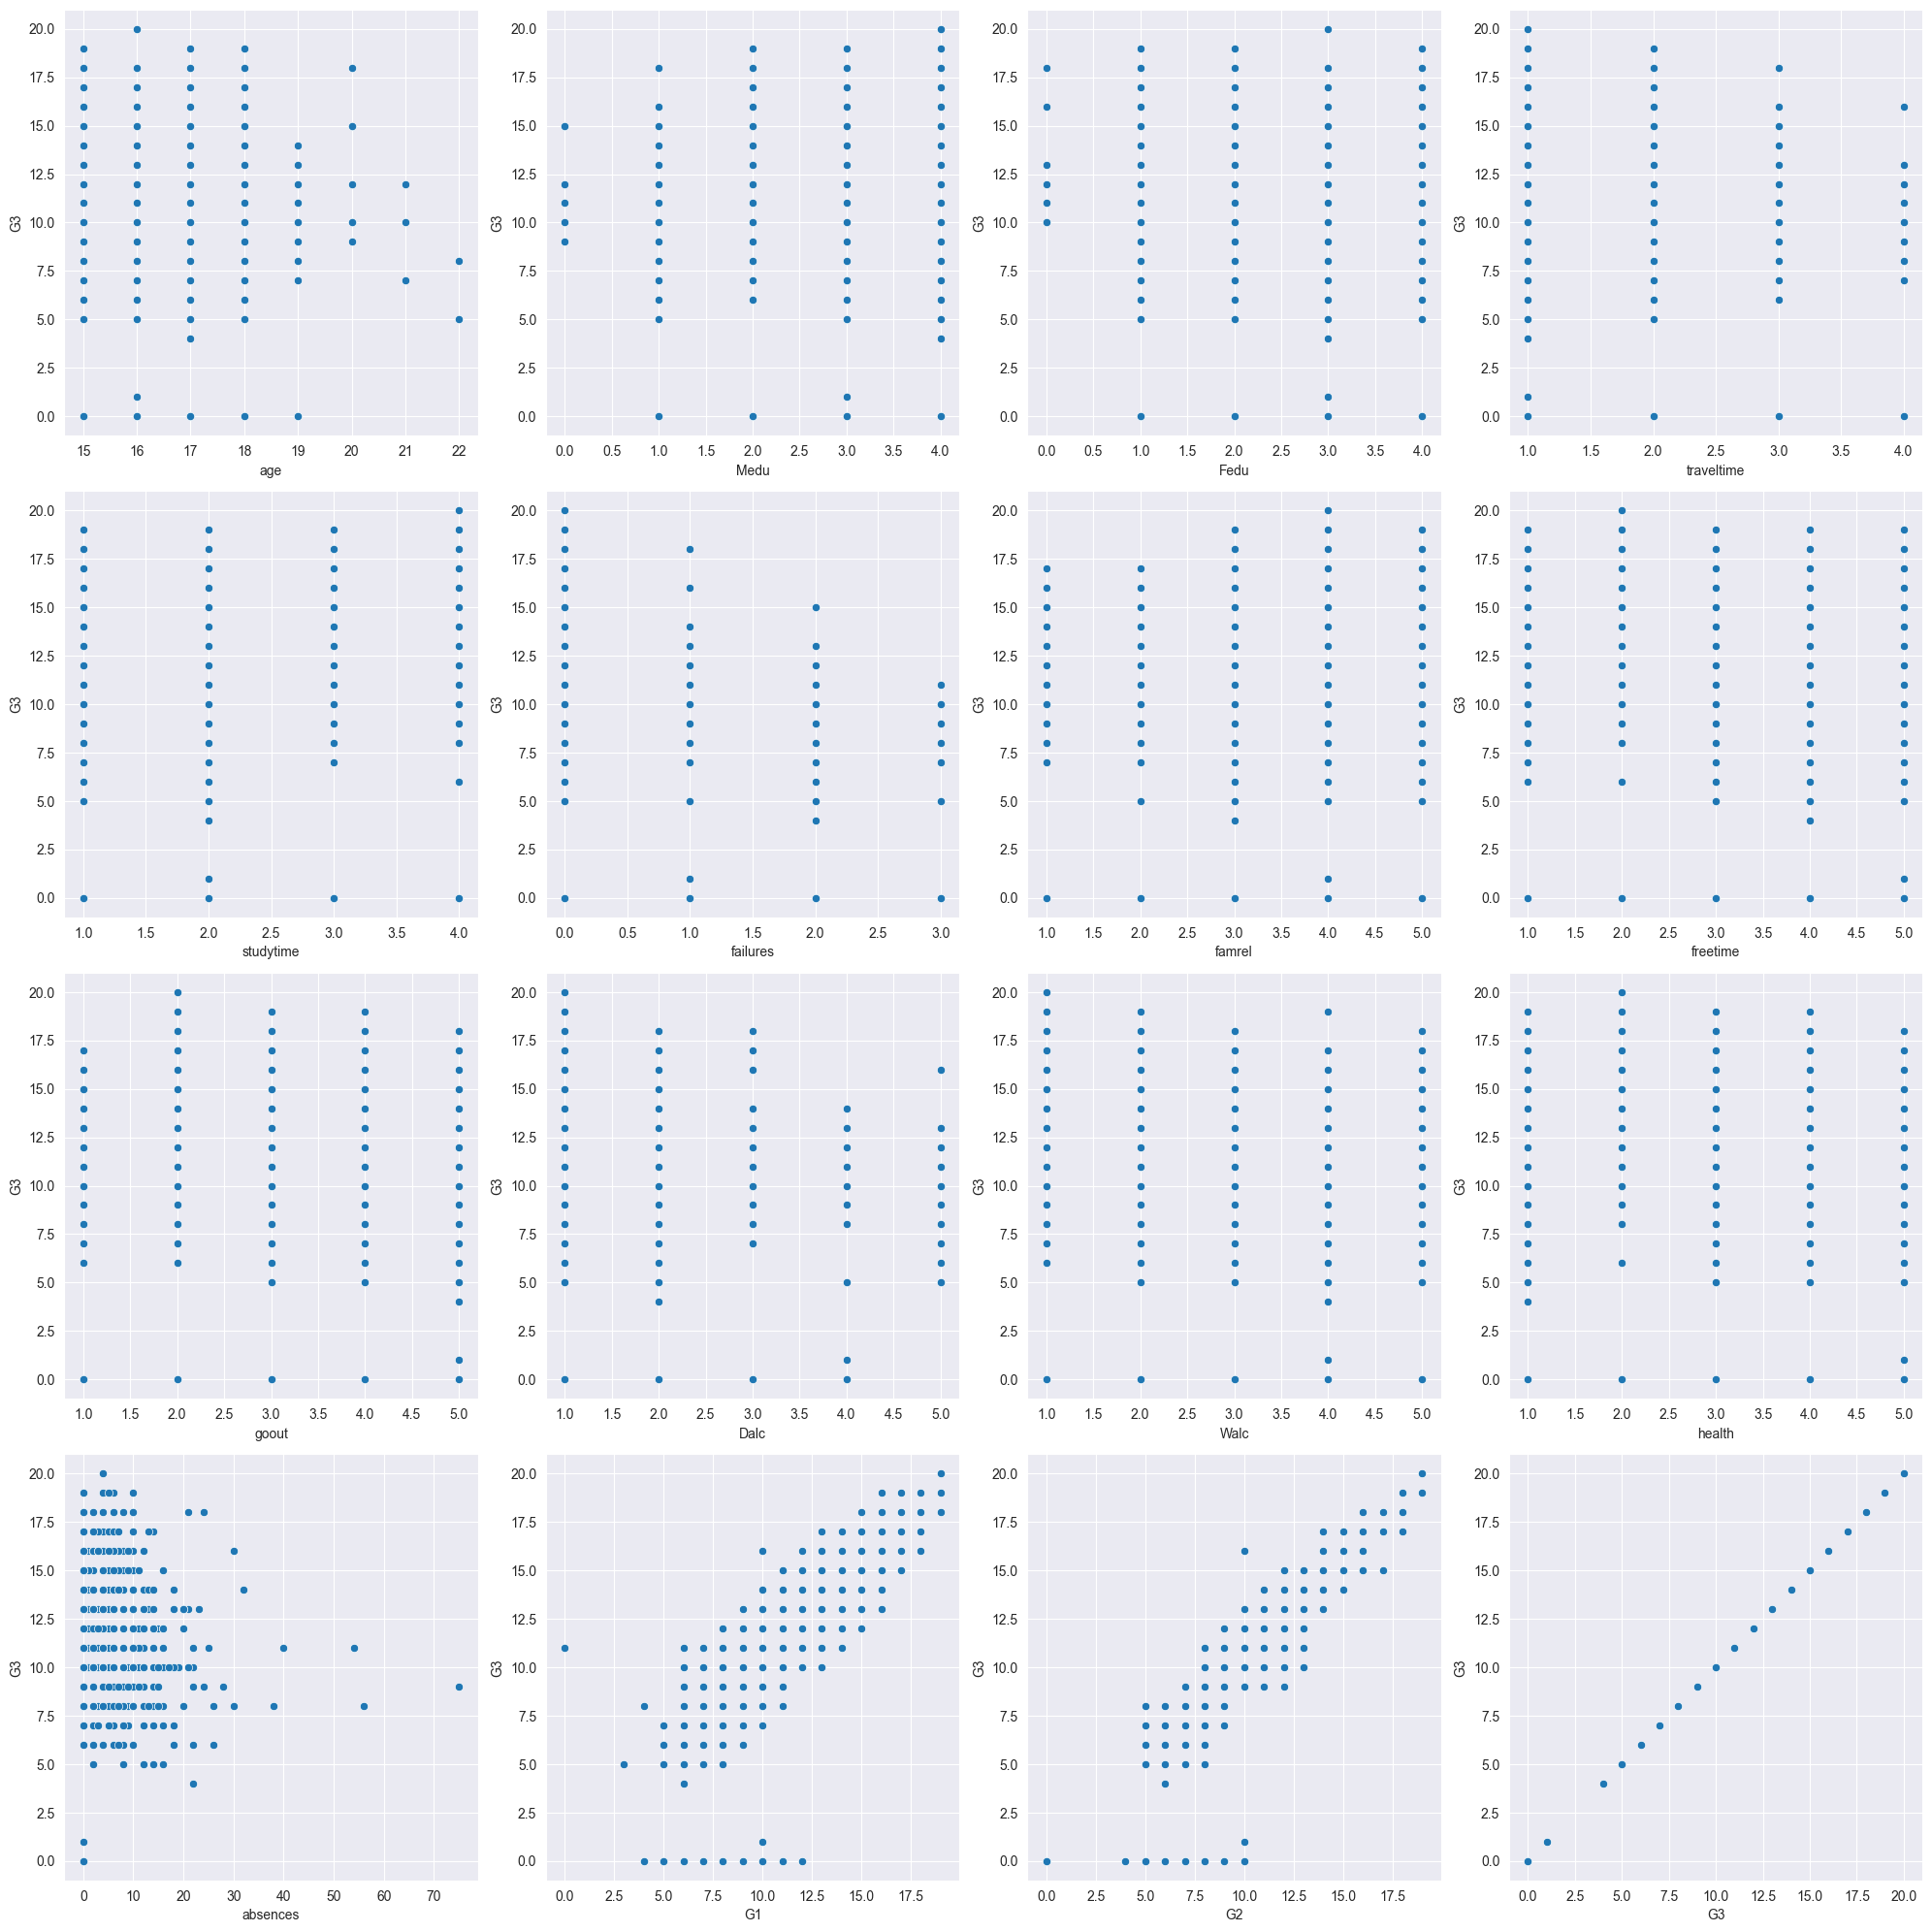

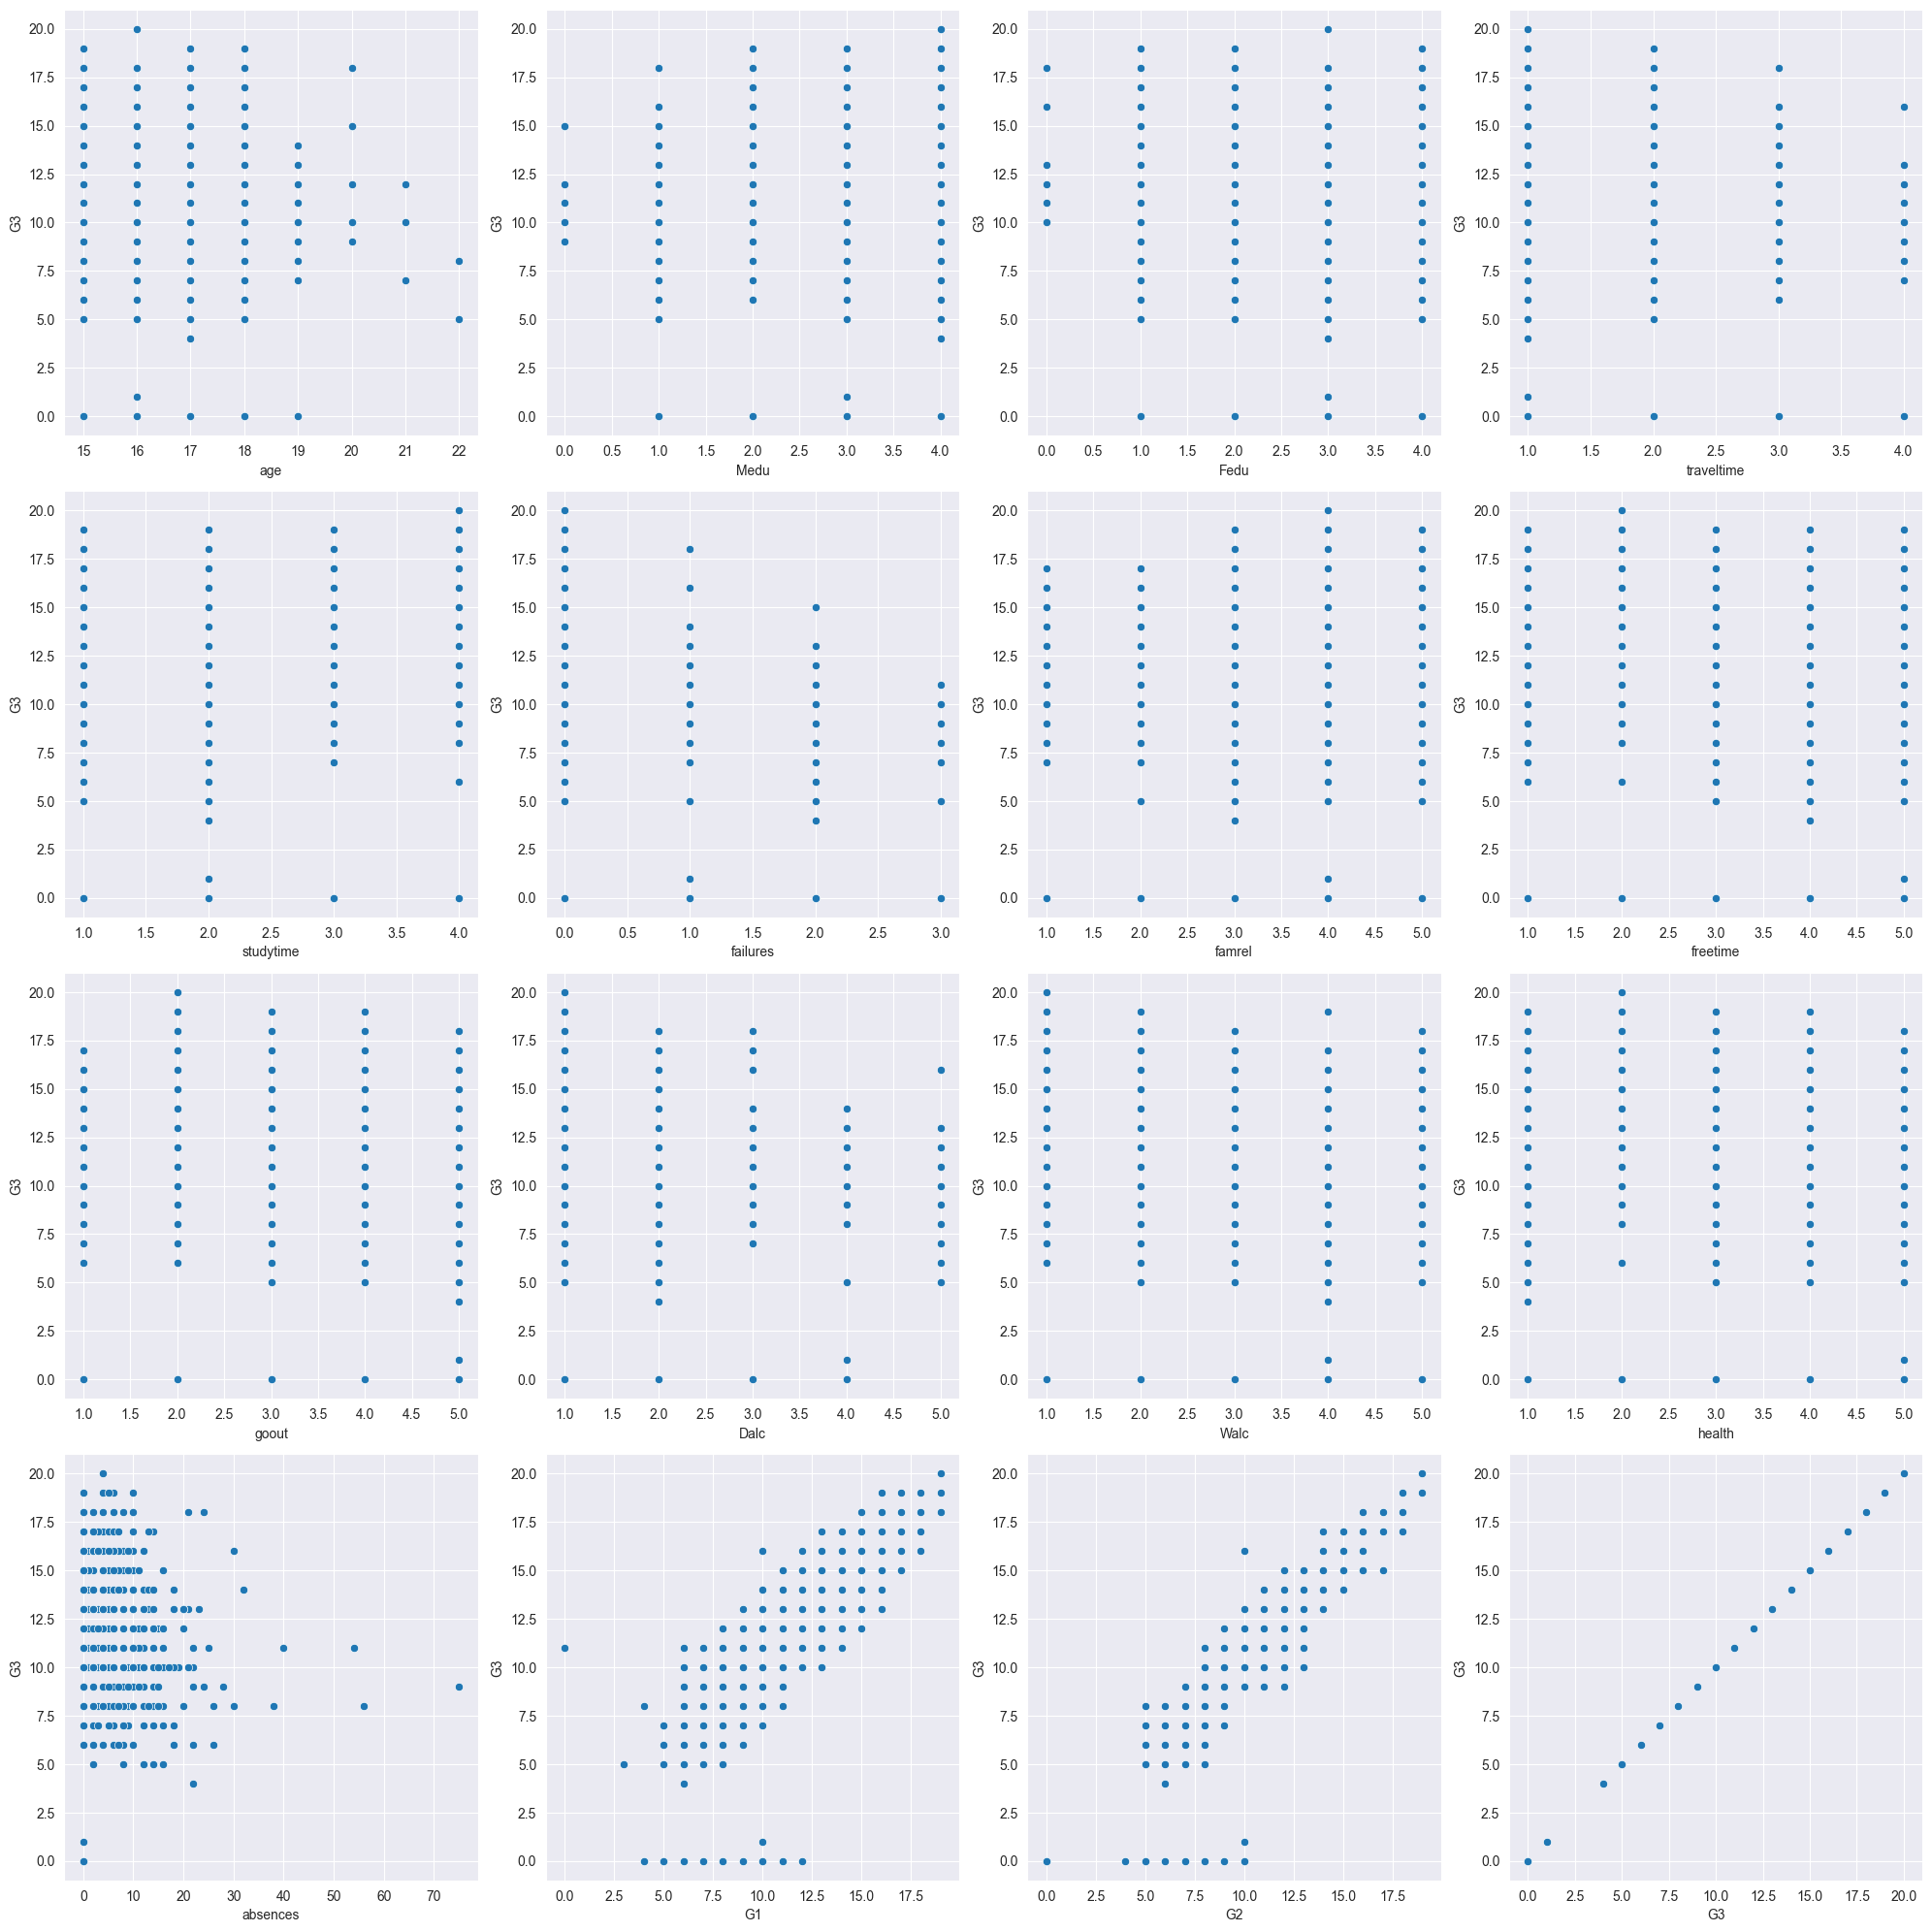

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

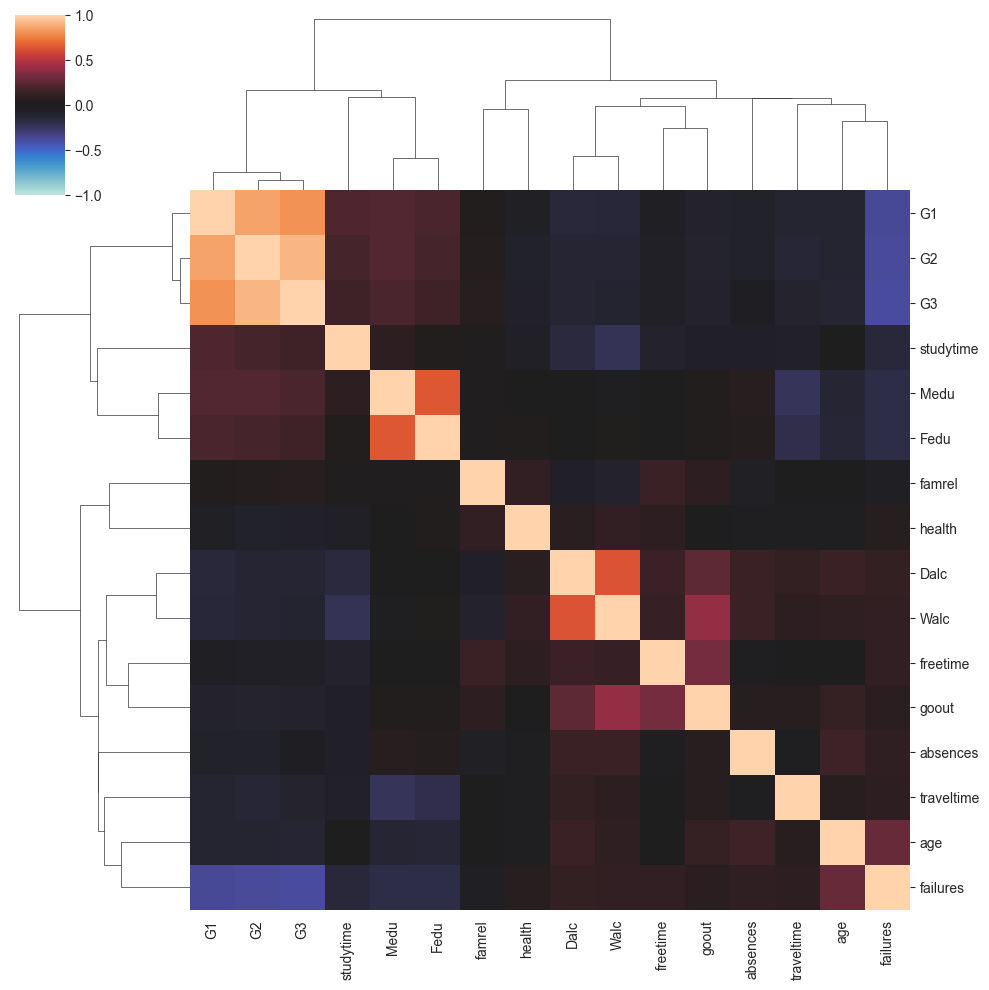

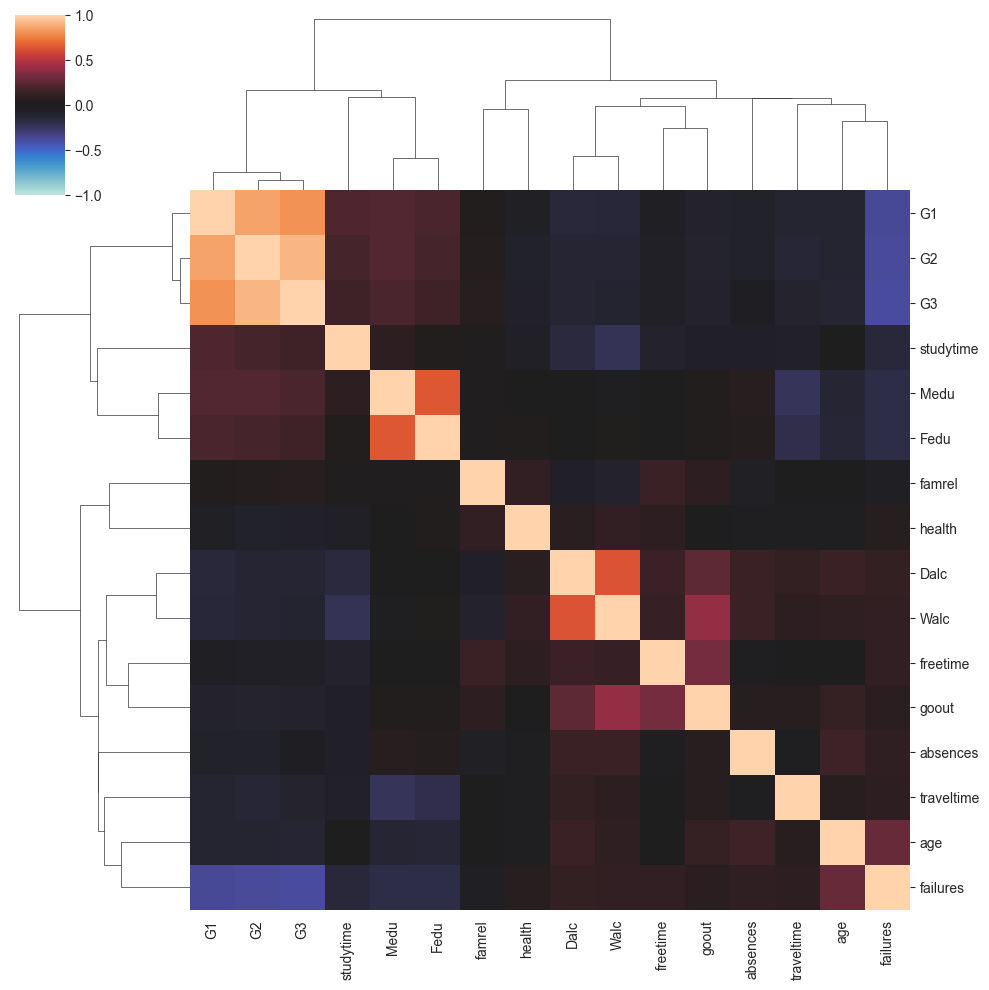

In [28]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(num_df, annot=None)

In [29]:
def corrgraph(model,train):
        # Получение коэффициентов модели
    coefficients = model.coef_[0]
    # Получение названий признаков (если есть)
    feature_names = train.columns
    # Визуализация коэффициентов
    fig = plt.figure(figsize=(15, 6))
    plt.bar(feature_names, abs(coefficients))
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.title(f'Feature Coefficients for {model}')
    plt.xticks(rotation='vertical')
    plt.show()

In [30]:
def corrtree(model,train):
    feature_names = []
    coefficients = []
    for name, importance in zip(train.columns, model.feature_importances_):
        coefficients.append(importance)
        feature_names.append(name)
    fig = plt.figure(figsize=(15, 6))
    plt.bar(feature_names, coefficients)
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.title(f'Feature Coefficients for {model}')
    plt.xticks(rotation='vertical')
    plt.show()

<AxesSubplot:>

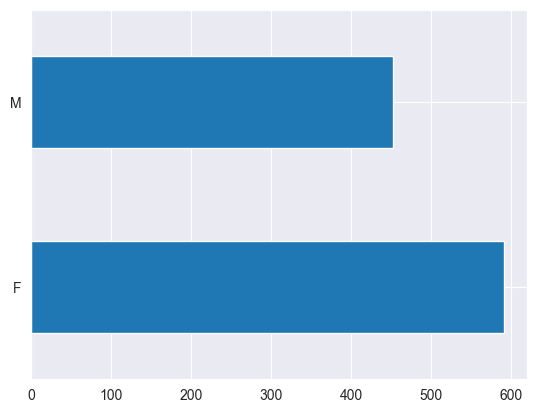

In [31]:
df.sex.value_counts().plot.barh()

In [32]:
label_encoder = LabelEncoder()
categ = ['sex', 'address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,0,1,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,0,1,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,0,1,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,1,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,0,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,1,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [33]:
df = pd.get_dummies(data =df, columns=["Mjob","Fjob", 'reason','guardian'])
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


In [34]:
col = ['age', 'Fedu','traveltime', 'studytime','famrel','freetime', 'goout','Dalc','Walc','health','absences']
df[col]= df[col].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0.428571,1,0,0,4,1.00,0.333333,0.333333,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0.285714,1,0,1,1,0.25,0.000000,0.333333,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0.000000,1,1,1,1,0.25,0.000000,0.333333,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0.000000,1,0,1,4,0.50,0.000000,0.666667,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0.714286,1,1,0,2,0.50,0.000000,0.333333,2,...,0,1,0,1,0,0,0,0,0,1
391,1,0.285714,1,1,1,3,0.25,0.333333,0.000000,0,...,0,1,0,1,0,0,0,0,1,0
392,1,0.857143,0,0,1,1,0.25,0.000000,0.000000,3,...,1,0,0,1,0,0,0,0,0,1
393,1,0.428571,0,1,1,3,0.50,0.666667,0.000000,0,...,1,0,0,1,0,0,0,0,1,0


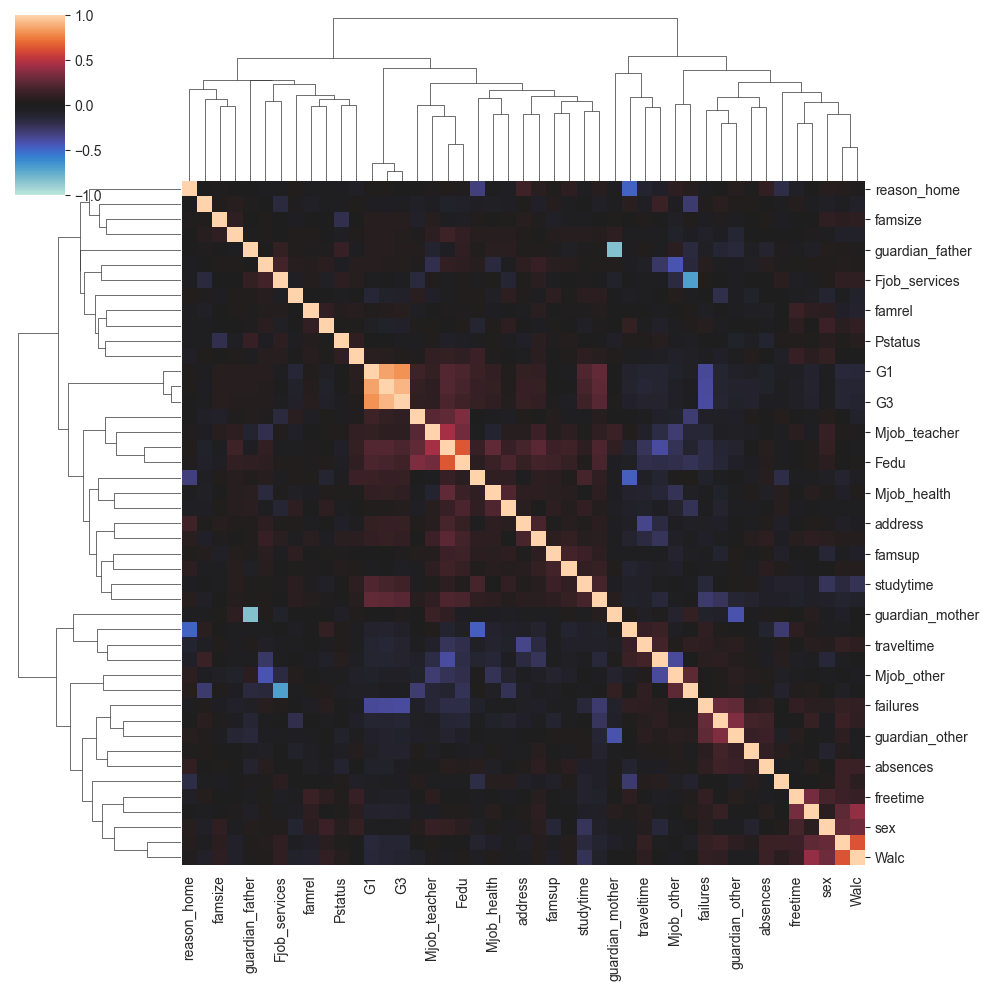

In [35]:
num_df = df.select_dtypes(exclude='object')
corrplot(num_df, annot=None)

### удаление нулей в g3

In [36]:
grades = ['G1', 'G2', 'G3']
list_zeros_math = pd.DataFrame(df[grades].loc[df['G3']==0])
list_zeros_math

,G1,G2,G3
163,11,9,0
440,7,0,0
519,8,7,0
563,7,0,0
567,4,0,0
583,8,6,0
586,8,8,0
597,9,0,0
603,5,0,0
605,5,0,0


In [37]:
df.drop(df[df['G3']==0].index, inplace=True)
df.shape

(952, 45)

# Раздел Регрессии
### Создание двух датафреймов для трейн и тест регрессий

In [38]:
X = df.drop(["G1","G2","G3"], axis = 1)
y = df[["G1","G2","G3"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)
train_df = pd.concat([X_train, y_train])
train_df = X_train
train_df["G1"] = y_train["G1"]
train_df["G2"] = y_train["G2"]
train_df["G3"] = y_train["G3"]
test_df = pd.concat([X_test, y_test],axis=1)

In [39]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df

,index,0
0,sex,0.0
1,age,0.0
2,address,0.0
3,famsize,0.0
4,Pstatus,0.0
5,Medu,0.0
6,Fedu,0.0
7,traveltime,0.0
8,studytime,0.0
9,failures,0.0


In [40]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [41]:
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

[]

In [42]:
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

['Fjob_health']

In [43]:
train_df = train_df.drop(overfit_num, axis=1)
test_df = test_df.drop(overfit_num, axis = 1)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Регрессии через  KFold

In [45]:
#Проверка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
XX = df.drop(["G1","G2","G3"], axis = 1)
Y = df[["G3"]]

In [46]:
modelSGD = SGDRegressor()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelSGD.partial_fit(X_train, y_train)
    score = modelSGD.score(X_test, y_test)
    print(score)
print(score)

-0.2135346257188666
0.1433011827790689
0.1401106997307101
0.09922609802282667
0.1767627524014752
0.1767627524014752


In [47]:
modelRidge = Ridge(alpha=1,solver='saga')
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelRidge.fit(X_train, y_train)
    score = modelRidge.score(X_test, y_test)
    print(score)
print(score)

0.26221090461996055
0.23150900778799643
0.2818961389684226
0.29516058137612133
0.2692983152125821
0.2692983152125821


In [48]:
model = LinearRegression()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
print(score)

0.26340091031563606
0.2343098193317733
0.2743049672453889
0.2960043877877425
0.26946870606810125
0.26946870606810125


### Отдельные Регрессии

In [49]:
#Разбиение на Train Test для регрессий.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]

In [50]:
mX_train.shape, mX_test.shape, mY_train.shape, mY_test.shape

((714, 41), (238, 41), (714, 1), (238, 1))

In [51]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(mX_train, mY_train)
Gradient_score = Gradient_model.predict(mX_test)
Gradient_model.score(mX_test,mY_test)

0.3013485911484637

In [52]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(mX_train, mY_train)
Linearscore = LinearRegression_model.predict(mX_test)
LinearRegression_model.score(mX_test,mY_test)

0.27667079024923424

In [53]:
pf = PolynomialFeatures()
x_poly = pf.fit_transform(mX_train)
LinearRegression_model.fit(x_poly,mY_train)
LinearRegression_model.score(mX_test,mY_test)

ValueError: X has 41 features, but LinearRegression is expecting 903 features as input.

[Text(0.5, 1.0, 'Exam predictions Linear Regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

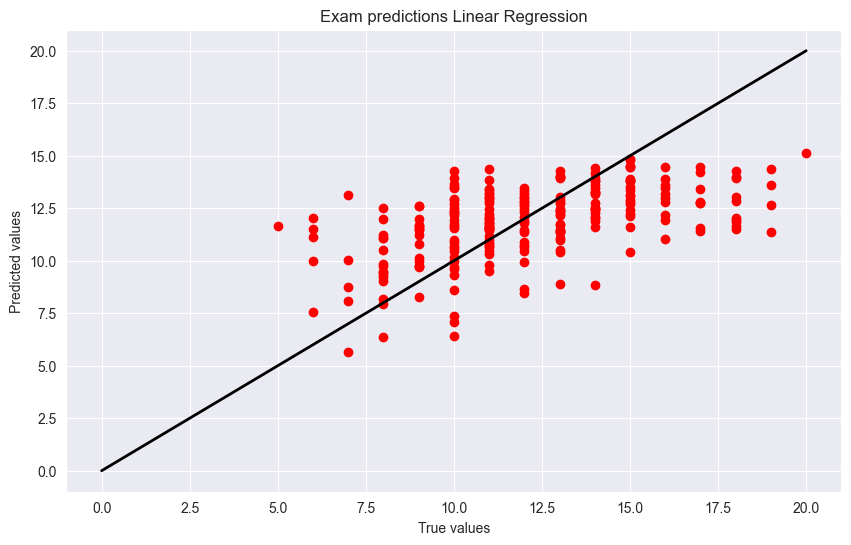

In [54]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Linearscore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Linear Regression', xlabel='True values', ylabel='Predicted values')

In [55]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(mX_train,mY_train)
lasso_predict = lasso_model.predict(mX_test)
lasso_model.score(mX_test,mY_test)

0.15393785954256234

[Text(0.5, 1.0, 'Exam predictions Lasso Regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

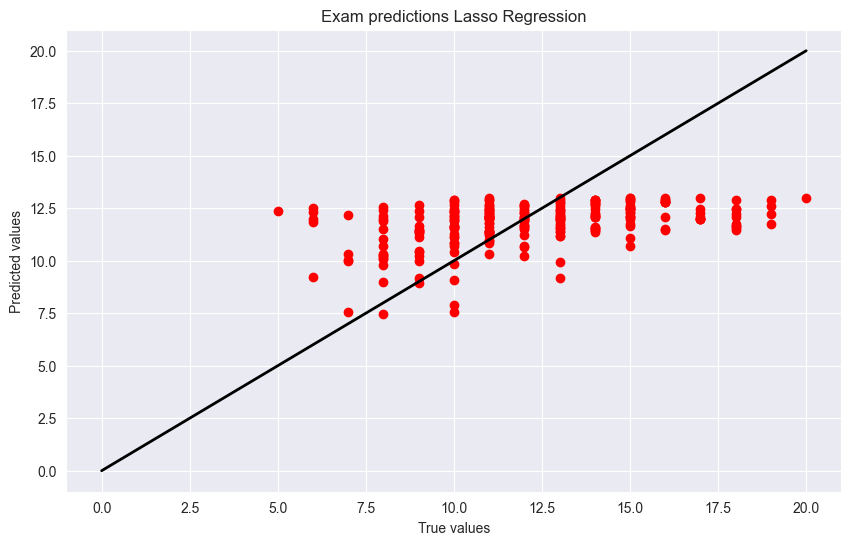

In [56]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,lasso_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Lasso Regression', xlabel='True values', ylabel='Predicted values')

In [57]:
from sklearn import tree
from sklearn.tree import plot_tree

In [58]:
Tree_model = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=20,min_samples_split= 2)
Tree_model.fit(mX_train,mY_train)
Treescore = Tree_model.predict(mX_test)
Tree_model.score(mX_test,mY_test)

0.19174756885501665

[Text(0.5, 1.0, 'Exam predictions Tree regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

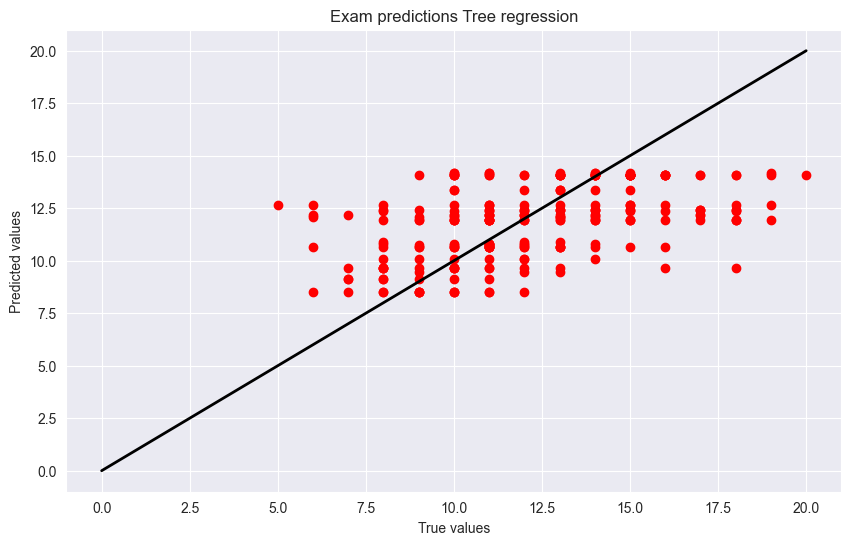

In [59]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Treescore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Tree regression', xlabel='True values', ylabel='Predicted values')

In [60]:
import graphviz
dot_data = tree.export_graphviz(Tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Tree")

'Tree.pdf'

[Text(0.7299107142857143, 0.9285714285714286, 'x[9] <= 0.5\nsquared_error = 8.259\nsamples = 714\nvalue = 11.866'),
 Text(0.53125, 0.7857142857142857, 'x[10] <= 0.5\nsquared_error = 7.53\nsamples = 607\nvalue = 12.306'),
 Text(0.3125, 0.6428571428571429, 'x[5] <= 2.5\nsquared_error = 7.454\nsamples = 528\nvalue = 12.515'),
 Text(0.10714285714285714, 0.5, 'x[15] <= 0.5\nsquared_error = 5.829\nsamples = 221\nvalue = 11.778'),
 Text(0.07142857142857142, 0.35714285714285715, 'squared_error = 1.91\nsamples = 24\nvalue = 10.083'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[24] <= 0.02\nsquared_error = 5.913\nsamples = 197\nvalue = 11.985'),
 Text(0.07142857142857142, 0.21428571428571427, 'x[17] <= 0.5\nsquared_error = 5.562\nsamples = 74\nvalue = 12.757'),
 Text(0.03571428571428571, 0.07142857142857142, 'squared_error = 4.539\nsamples = 47\nvalue = 12.404'),
 Text(0.10714285714285714, 0.07142857142857142, 'squared_error = 6.752\nsamples = 27\nvalue = 13.37'),
 Text(0.2142857142857142

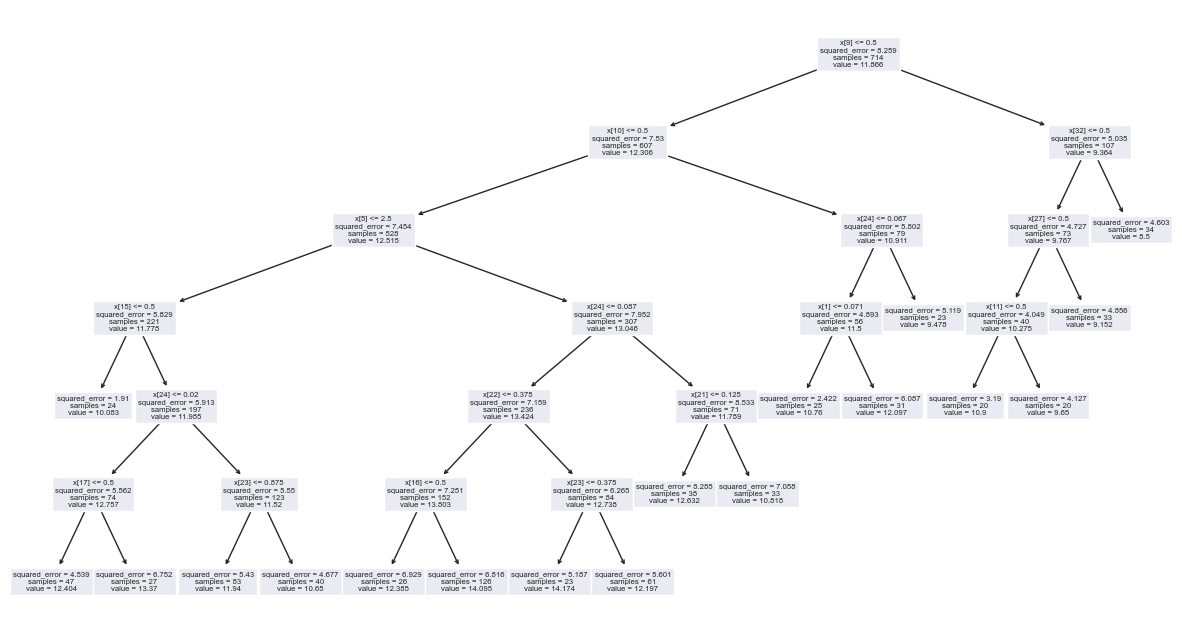

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(Tree_model)


# Раздел классификации.
## Разделение G3 на диапазоны 0-5 5-10 10-15 15-20

In [62]:
def trans(x):
    if x == 20:
        return 3
    return x % 5

In [63]:
# Новый датафрейм чтобы не мешать старому
df1 = df
df1['G3'] = df1['G3'].apply(trans)
df1['G2'] = df1['G2'].apply(trans)
df1['G1'] = df1['G1'].apply(trans)

In [64]:
X = df1.drop(["G1", "G2", "G3"], axis=1)
y = df1[["G1", "G2", "G3"]]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=12)
train_df_1 = pd.concat([X_train_1, y_train_1])
train_df_1 = X_train_1
train_df_1["G1"] = y_train_1["G1"]
train_df_1["G2"] = y_train_1["G2"]
train_df_1["G3"] = y_train_1["G3"]
test_df_1 = pd.concat([X_test_1, y_test_1], axis=1)

In [65]:
#Разбиение на Train Test для классификаций.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train_1 = train_df_1.drop(delete, axis = 1)
mY_train_1 = train_df_1[target]
mX_test_1 = test_df_1.drop(delete, axis = 1)
mY_test_1 = test_df_1[target]

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from catboost import CatBoostClassifier

In [67]:
Logic_model = LogisticRegression()
Logic_model.fit(mX_train_1, mY_train_1)
Logic_model.score(mX_test_1,mY_test_1)


0.21428571428571427

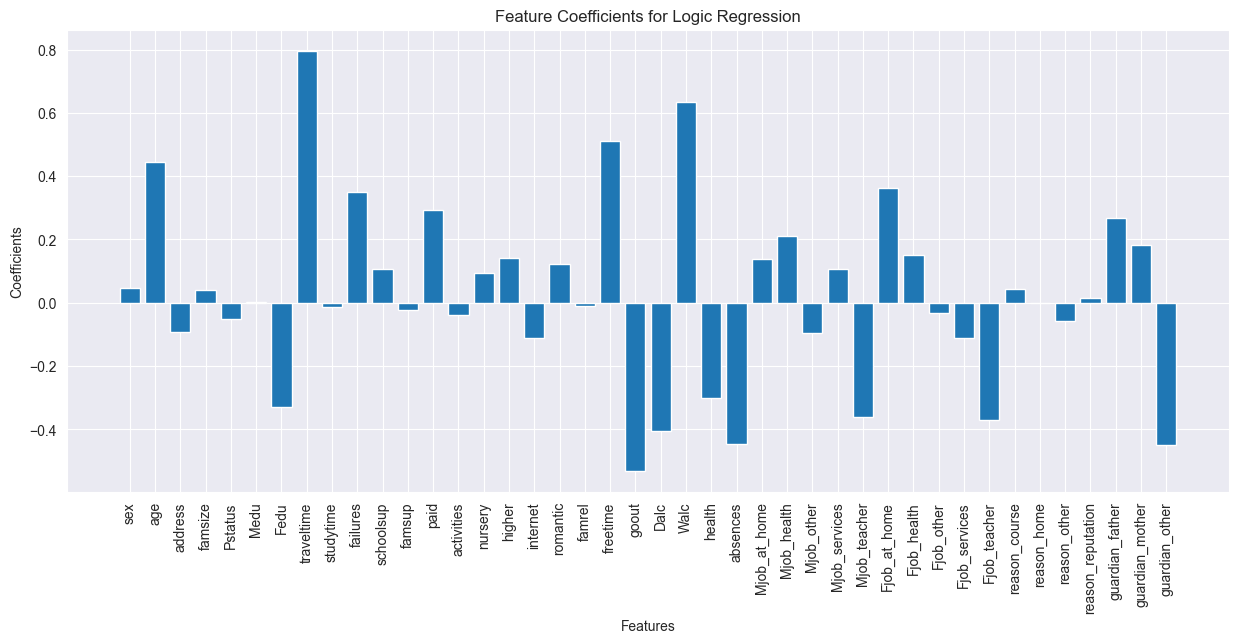

In [68]:
# Получение коэффициентов модели
coefficients = Logic_model.coef_[0]
# Получение названий признаков (если есть)
feature_names = mX_test_1.columns
# Визуализация коэффициентов
fig = plt.figure(figsize=(15, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients for Logic Regression')
plt.xticks(rotation='vertical')
plt.show()

In [69]:
tree_class_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
tree_class_model.fit(mX_train_1, mY_train_1)
tree_class_model.predict(mX_test_1)
tree_class_model.score(mX_test_1,mY_test_1)


0.23949579831932774

[Text(0.6693548387096774, 0.9285714285714286, 'x[9] <= 0.5\ngini = 0.794\nsamples = 714\nvalue = [178, 160, 115, 147, 114]'),
 Text(0.46774193548387094, 0.7857142857142857, 'x[25] <= 0.5\ngini = 0.795\nsamples = 607\nvalue = [139, 149, 101, 118, 100]'),
 Text(0.2903225806451613, 0.6428571428571429, 'x[18] <= 0.875\ngini = 0.797\nsamples = 512\nvalue = [110, 119, 93, 104, 86]'),
 Text(0.16129032258064516, 0.5, 'x[30] <= 0.5\ngini = 0.791\nsamples = 360\nvalue = [87, 91, 62, 68, 52]'),
 Text(0.12903225806451613, 0.35714285714285715, 'x[23] <= 0.125\ngini = 0.792\nsamples = 344\nvalue = [80, 87, 62, 68, 47]'),
 Text(0.06451612903225806, 0.21428571428571427, 'x[5] <= 2.5\ngini = 0.722\nsamples = 47\nvalue = [18, 10, 4, 13, 2]'),
 Text(0.03225806451612903, 0.07142857142857142, 'gini = 0.578\nsamples = 15\nvalue = [9, 2, 0, 3, 1]'),
 Text(0.0967741935483871, 0.07142857142857142, 'gini = 0.744\nsamples = 32\nvalue = [9, 8, 4, 10, 1]'),
 Text(0.1935483870967742, 0.21428571428571427, 'x[1] <= 0

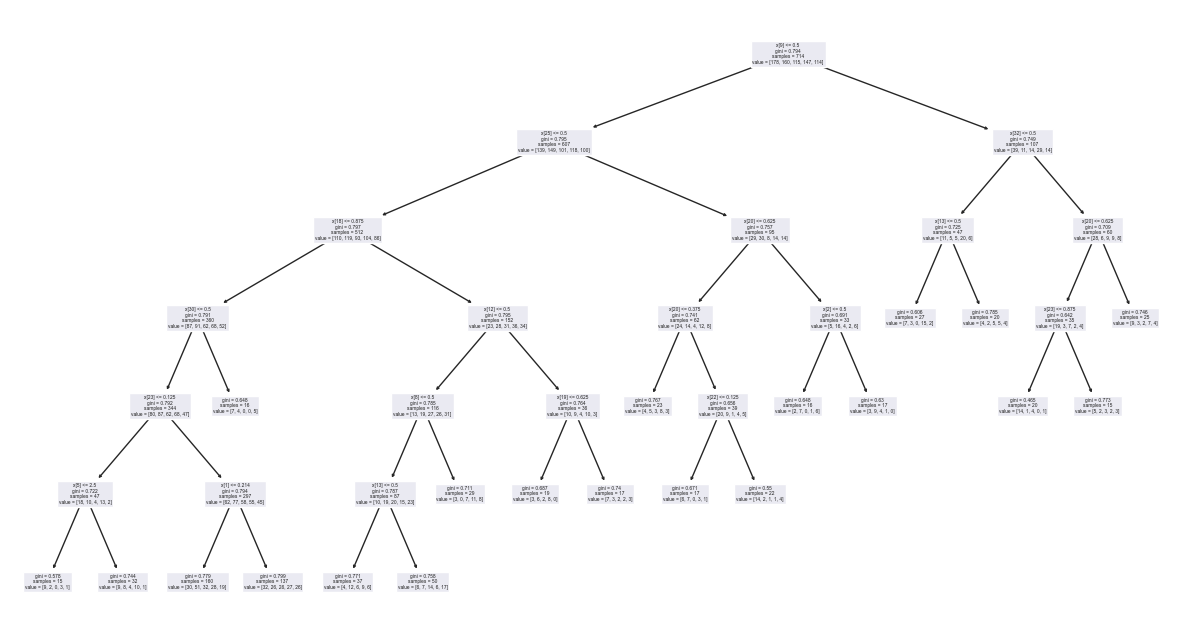

In [70]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model)

In [71]:
Cat_class_model_g3 = CatBoostClassifier()
Cat_class_model_g3.fit(mX_train_1, mY_train_1)
Cat_class_model_g3_predict = Cat_class_model_g3.predict(mX_test_1)
Cat_class_model_g3.score(mX_test_1, mY_test_1)

Learning rate set to 0.077779
0:	learn: 1.6055899	total: 151ms	remaining: 2m 30s
1:	learn: 1.5991884	total: 161ms	remaining: 1m 20s
2:	learn: 1.5905826	total: 187ms	remaining: 1m 2s
3:	learn: 1.5825584	total: 197ms	remaining: 49s
4:	learn: 1.5763772	total: 220ms	remaining: 43.9s
5:	learn: 1.5678330	total: 231ms	remaining: 38.2s
6:	learn: 1.5627669	total: 238ms	remaining: 33.8s
7:	learn: 1.5577750	total: 247ms	remaining: 30.7s
8:	learn: 1.5526347	total: 255ms	remaining: 28.1s
9:	learn: 1.5459503	total: 266ms	remaining: 26.3s
10:	learn: 1.5372301	total: 274ms	remaining: 24.6s
11:	learn: 1.5319235	total: 286ms	remaining: 23.5s
12:	learn: 1.5242418	total: 294ms	remaining: 22.3s
13:	learn: 1.5181702	total: 302ms	remaining: 21.3s
14:	learn: 1.5099763	total: 313ms	remaining: 20.5s
15:	learn: 1.5022422	total: 321ms	remaining: 19.7s
16:	learn: 1.4969656	total: 329ms	remaining: 19s
17:	learn: 1.4928810	total: 337ms	remaining: 18.4s
18:	learn: 1.4863231	total: 363ms	remaining: 18.8s
19:	learn: 1.

0.1638655462184874

# Предсказывание других целей
## Например уровня буднего алкоголизма

In [72]:
#Разбиение на Train Test для классификации.
delete = ["Dalc","Walc"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["Dalc"]

lab = preprocessing.LabelEncoder()
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]
mY_train = lab.fit_transform(mY_train)
mY_test = lab.fit_transform(mY_test)

In [73]:
unique_values, counts = np.unique(mY_train, return_counts=True)
print(unique_values,counts)

[0 1 2 3 4] [504 125  48  18  19]


In [74]:
Logic_model_alc = LogisticRegression()
Logic_model_alc.fit(mX_train, mY_train)
Logic_model_alc_predict = Logic_model_alc.predict(mX_test)
Logic_model_alc.score(mX_test,mY_test)

0.6680672268907563

Accuracy: 0.68


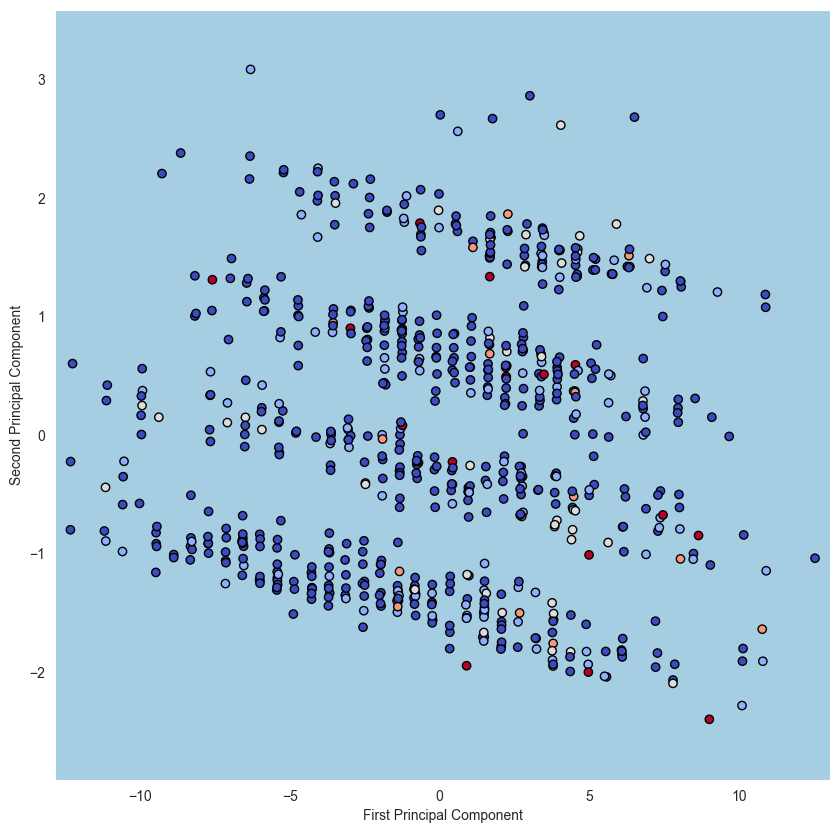

In [95]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(mX_train)
X_test_pca = pca.transform(mX_test)
clf = LogisticRegression().fit(X_train_pca, mY_train)
y_pred = clf.predict(X_test_pca)
# Рассчитайте точность
accuracy = accuracy_score(mY_test, y_pred)
print('Accuracy: %.2f' % accuracy)
# Создайте сетку координат для визуализации
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Используйте модель для прогнозирования на сетке
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Покажите результат
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Также покажите обучающие точки
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=mY_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()


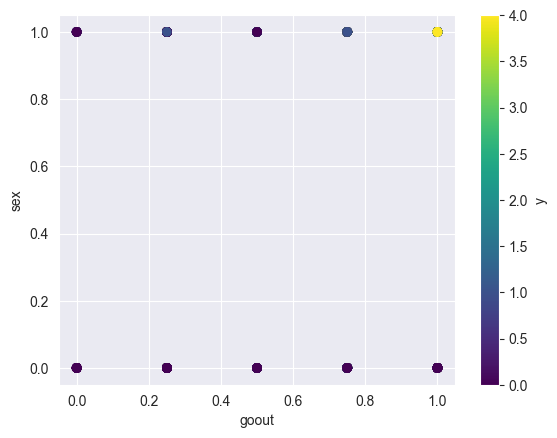

In [101]:
import matplotlib.pyplot as plt

# предположим, что 'df' - это ваш датафрейм
x1 = mX_train['goout']
x2 = mX_train['sex']
colors = mY_train
# Выберите два признака для визуализации

plt.scatter(x1, x2, c=colors, cmap='viridis')
plt.colorbar(label='y')  # показывает цветовую шкалу с меткой 'y'
plt.xlabel('goout')
plt.ylabel('sex')
plt.show()


In [104]:

# Предположим, что arr - это ваш numpy массив
unique, counts = np.unique(mY_train, return_counts=True)

# Вывод уникальных значений и их количества
for u, c in zip(unique, counts):
    print(f'Value: {u}, count: {c}')

Value: 0, count: 504
Value: 1, count: 125
Value: 2, count: 48
Value: 3, count: 18
Value: 4, count: 19


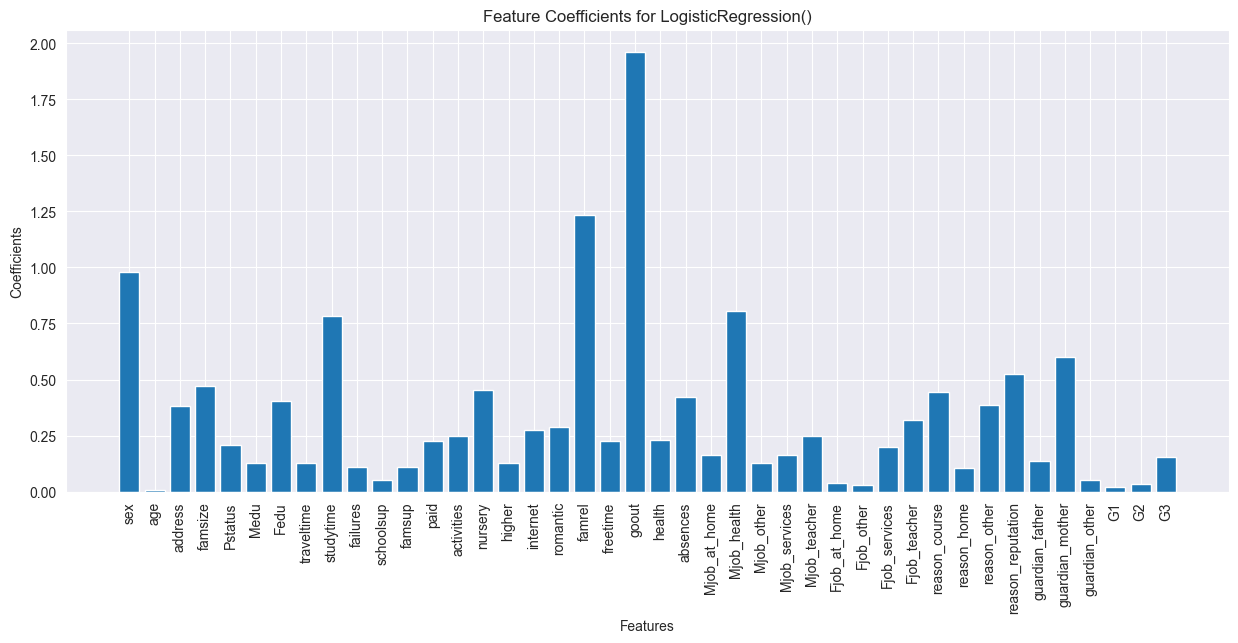

In [76]:
corrgraph(Logic_model_alc,mX_train)

[Text(0.5, 1.0, 'Exam predictions Logic Regression alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

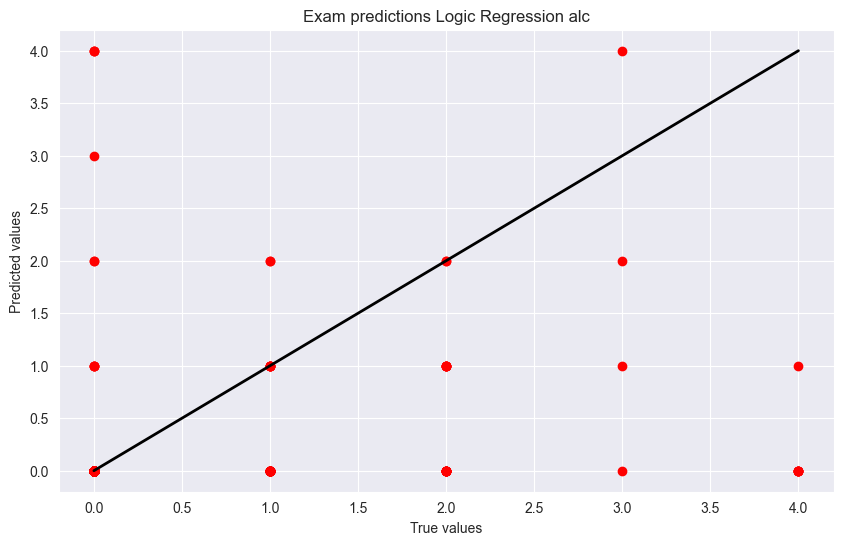

In [77]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Logic_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Logic Regression alc', xlabel='True values', ylabel='Predicted values')

In [78]:
tree_class_model_alc = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)
tree_class_model_alc.fit(mX_train, mY_train)
tree_model_alc_predict = tree_class_model_alc.predict(mX_test)
tree_class_model_alc.score(mX_test,mY_test)


0.6932773109243697

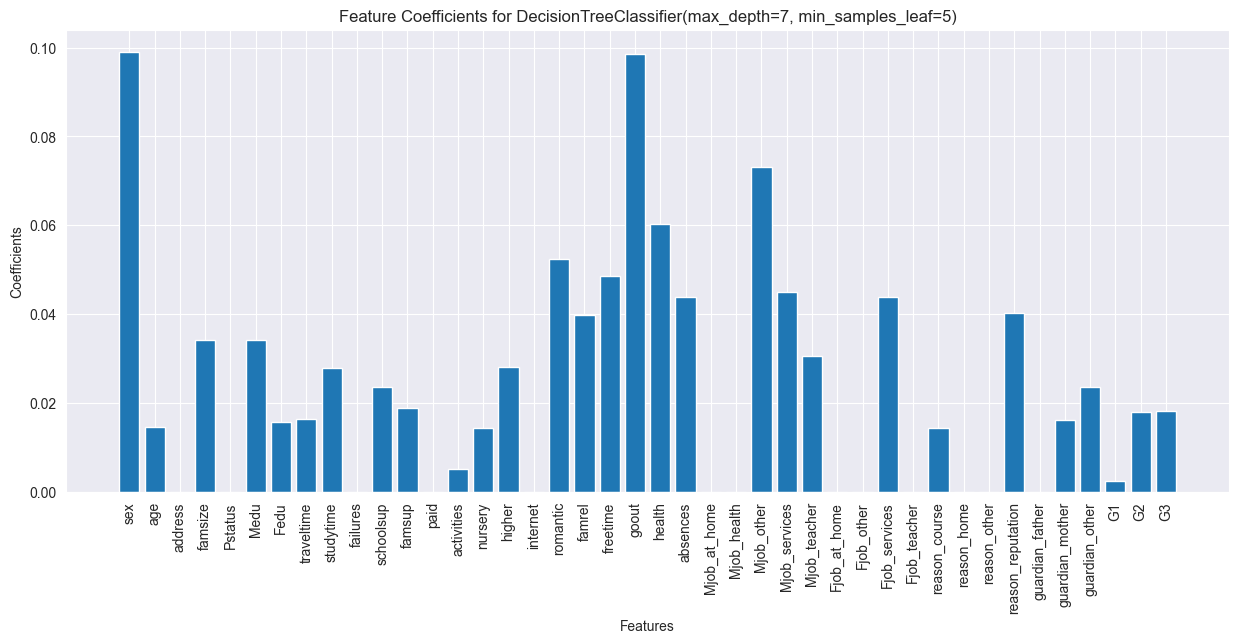

In [79]:
corrtree(tree_class_model_alc,mX_train)

[Text(0.4744718309859155, 0.9375, 'x[0] <= 0.5\ngini = 0.465\nsamples = 714\nvalue = [504, 125, 48, 18, 19]'),
 Text(0.22007042253521128, 0.8125, 'x[19] <= 0.375\ngini = 0.321\nsamples = 413\nvalue = [335, 58, 10, 7, 3]'),
 Text(0.08450704225352113, 0.6875, 'x[38] <= 0.5\ngini = 0.167\nsamples = 101\nvalue = [92, 4, 2, 3, 0]'),
 Text(0.07042253521126761, 0.5625, 'x[20] <= 0.625\ngini = 0.083\nsamples = 93\nvalue = [89, 2, 1, 1, 0]'),
 Text(0.04225352112676056, 0.4375, 'x[39] <= 16.5\ngini = 0.049\nsamples = 80\nvalue = [78, 0, 1, 1, 0]'),
 Text(0.028169014084507043, 0.3125, 'x[7] <= 0.5\ngini = 0.026\nsamples = 75\nvalue = [74, 0, 0, 1, 0]'),
 Text(0.014084507042253521, 0.1875, 'gini = 0.0\nsamples = 68\nvalue = [68, 0, 0, 0, 0]'),
 Text(0.04225352112676056, 0.1875, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 1, 0]'),
 Text(0.056338028169014086, 0.3125, 'gini = 0.32\nsamples = 5\nvalue = [4, 0, 1, 0, 0]'),
 Text(0.09859154929577464, 0.4375, 'x[13] <= 0.5\ngini = 0.26\nsamples = 13\nv

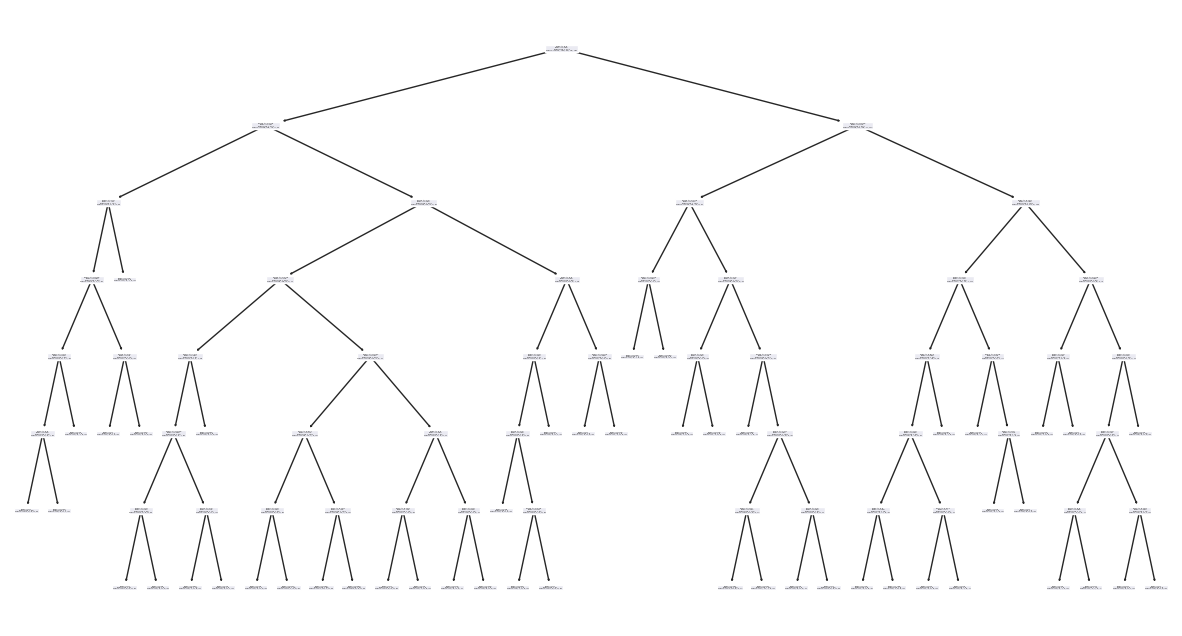

In [80]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model_alc)

[Text(0.5, 1.0, 'Exam predictions Tree alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

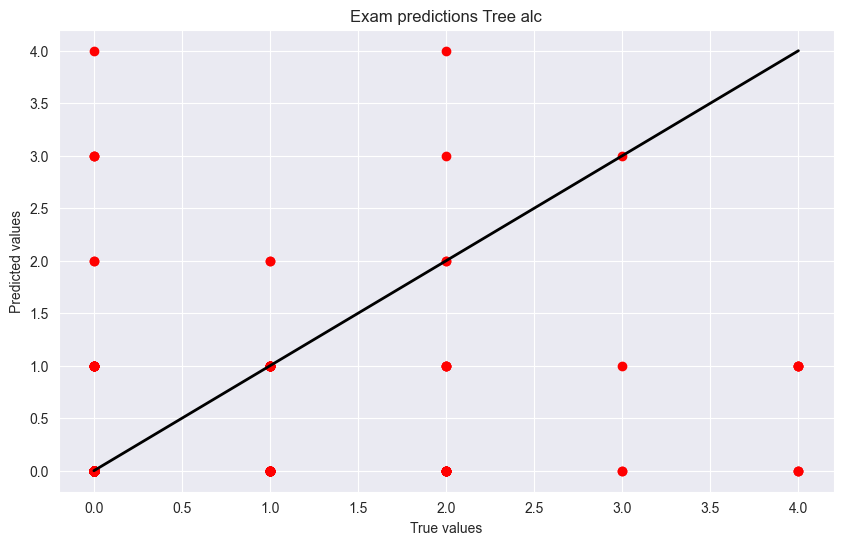

In [81]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,tree_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Tree alc', xlabel='True values', ylabel='Predicted values')

In [82]:
Gradient_class_model_alc = GradientBoostingClassifier(max_depth=7,loss='deviance')
Gradient_class_model_alc.fit(mX_train,mY_train)
Gradient_class_model_alc_predict = Gradient_class_model_alc.predict(mX_test)
Gradient_class_model_alc.score(mX_test,mY_test)

0.7941176470588235

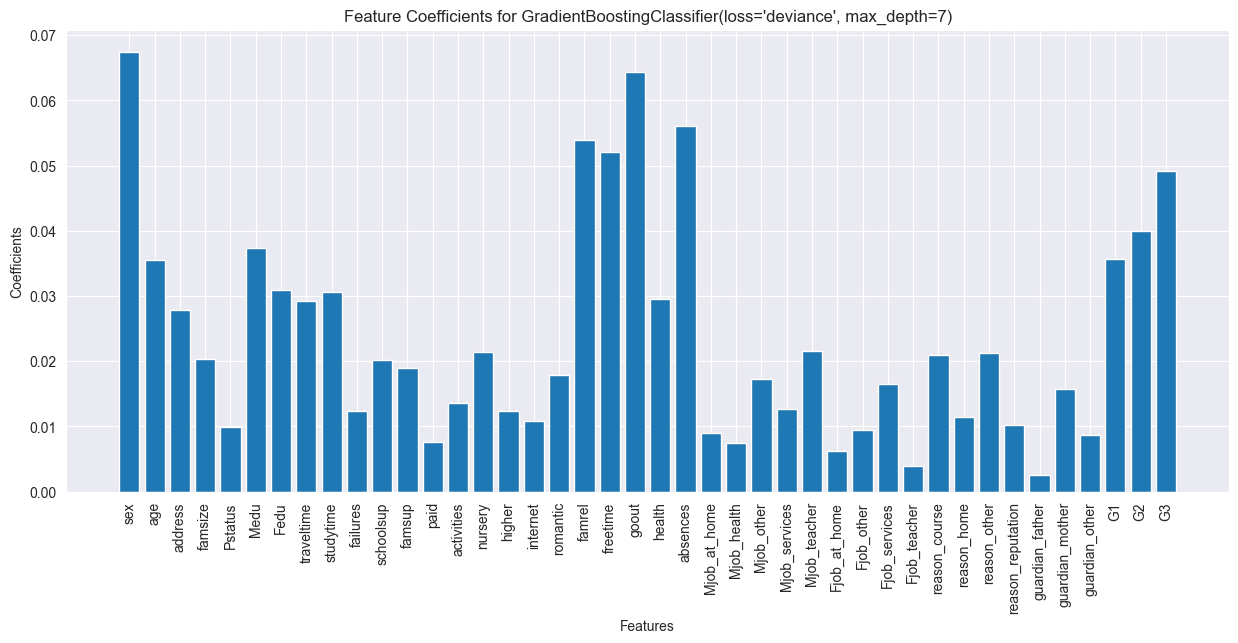

In [83]:
corrtree(Gradient_class_model_alc,mX_train)

In [84]:
Cat_class_model = CatBoostClassifier()
Cat_class_model.fit(mX_train, mY_train)
Cat_class_model_alc_predict = Cat_class_model.predict(mX_test)
Cat_class_model.score(mX_test, mY_test)

Learning rate set to 0.077779
0:	learn: 1.4938349	total: 9.29ms	remaining: 9.28s
1:	learn: 1.4154335	total: 22.5ms	remaining: 11.2s
2:	learn: 1.3419193	total: 33.4ms	remaining: 11.1s
3:	learn: 1.2840920	total: 41ms	remaining: 10.2s
4:	learn: 1.2292735	total: 48.3ms	remaining: 9.61s
5:	learn: 1.1848950	total: 56.6ms	remaining: 9.38s
6:	learn: 1.1497212	total: 61.8ms	remaining: 8.77s
7:	learn: 1.1158512	total: 67.2ms	remaining: 8.33s
8:	learn: 1.0840454	total: 72.1ms	remaining: 7.94s
9:	learn: 1.0578425	total: 117ms	remaining: 11.6s
10:	learn: 1.0296674	total: 124ms	remaining: 11.2s
11:	learn: 1.0052099	total: 164ms	remaining: 13.5s
12:	learn: 0.9849014	total: 172ms	remaining: 13.1s
13:	learn: 0.9647632	total: 181ms	remaining: 12.7s
14:	learn: 0.9452591	total: 189ms	remaining: 12.4s
15:	learn: 0.9278746	total: 197ms	remaining: 12.1s
16:	learn: 0.9107908	total: 204ms	remaining: 11.8s
17:	learn: 0.8956097	total: 212ms	remaining: 11.6s
18:	learn: 0.8833556	total: 219ms	remaining: 11.3s
19:	

0.8067226890756303

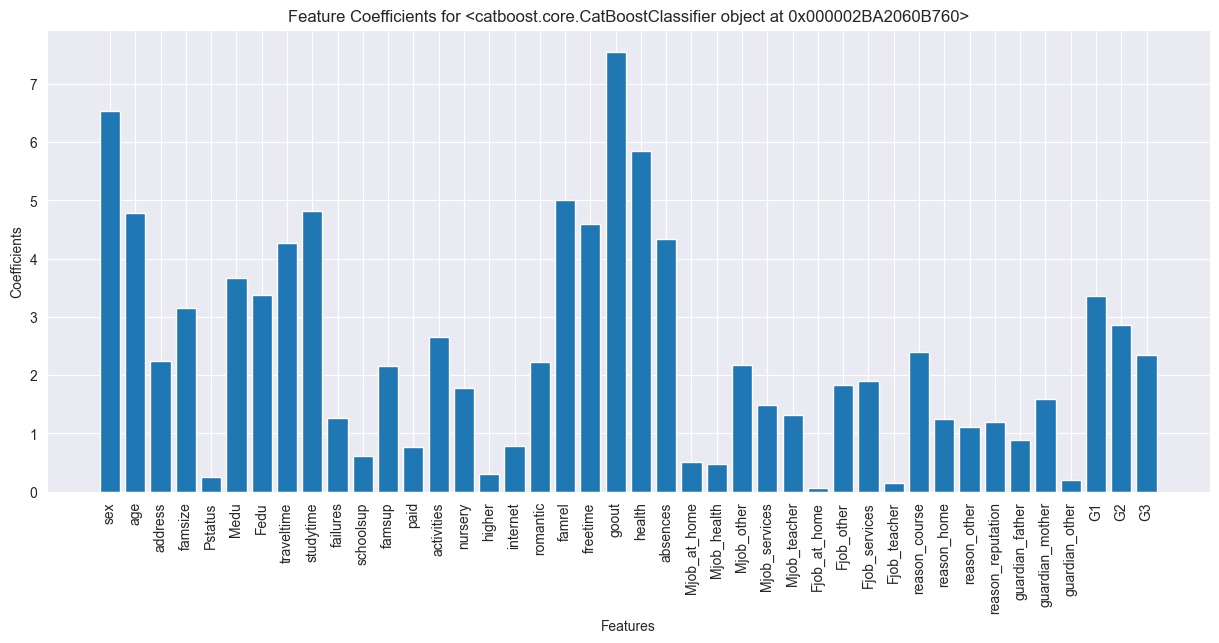

In [85]:
corrtree(Cat_class_model,mX_train)

[Text(0.5, 1.0, 'Exam predictions Cat boost alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

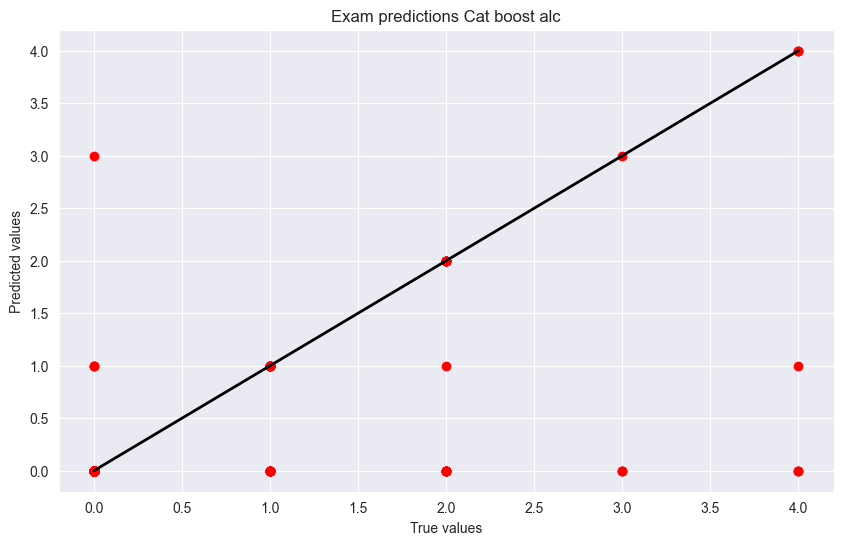

In [86]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Cat_class_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Cat boost alc', xlabel='True values', ylabel='Predicted values')

In [102]:
mX_train

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3
271,0,0.428571,1,0,1,2,0.75,0.000000,1.000000,0,...,0,0,0,1,1,0,0,15,14,14
40,0,0.142857,1,1,1,2,0.50,0.333333,0.333333,1,...,0,1,0,0,0,1,0,7,10,11
282,0,0.428571,0,1,1,1,0.25,0.333333,1.000000,0,...,0,0,0,1,0,1,0,12,12,12
533,0,0.142857,1,1,1,2,0.25,0.000000,0.333333,0,...,0,0,1,0,0,1,0,14,15,16
99,0,0.142857,1,0,1,4,0.75,0.000000,0.666667,0,...,1,0,0,0,0,1,0,7,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0,0.285714,1,1,0,4,0.50,0.000000,0.333333,0,...,1,0,0,0,0,1,0,15,14,14
279,1,1.000000,1,0,1,3,0.25,0.000000,0.000000,3,...,0,0,1,0,0,1,0,7,8,5
429,1,0.142857,0,1,0,4,1.00,0.000000,0.333333,0,...,0,1,0,0,0,1,0,10,11,11
71,1,0.000000,1,0,1,4,0.50,0.000000,1.000000,0,...,1,0,0,0,0,1,0,10,10,10
